# Proyecto: Los Camachos

El objetivo principal de la empresa elegida, Los Camachos, es incrementar el número de visitantes al parque acuático, por lo que se seleccionó como KPI el número total de visitantes. Este indicador fue seleccionado ya que muestra directamente el objetivo de la empresa. El número total de visitantes se desglosa en la cantidad de visitantes adultos y la cantidad de visitantes niños. Para analizar este KPI, se recopilaron y utilizaron diversas variables, que ya sea directa o indirectamente, afectan y se relacionan con el indicador elegido, y se describen a continuación:

- Fecha: Fecha específica del día.
- Temperatura promedio: Temperatura promedio registrada por día.
- Cantidad adultos: Número de adultos que visitaron el parque por día.
- Cantidad niños: Número de niños que visitaron el parque por día.
- Precio adulto: Precio individual de los boletos para adultos.
- Precio niño: Precio individual de los boletos para niños.
- Total adultos: Ingresos totales por boletos de adulto por día.
- Total niños: Ingresos totales por boletos de niño por día.
- Cantidad familiar: Número de cupones familiares comprados por día.
- Precio familiar: Precio de un cupón familiar, que incluye un paquete de entradas.
- Total familiar: Ingresos totales por cupones familiares por día.
- Cantidad de cupones especiales: Número de cupones especiales comprados por día.
- Precio especial: Precio de un cupón especial, que incluye un descuento o promoción.
- Total especial: Ingresos totales por cupones especiales por día.
- Asistentes totales: Todas las personas que visitaron el parque por día.
- Alimento: Ingresos totales por venta de alimentos dentro del parque por día.
- Extras: Ingresos totales por venta de objetos y servicios adicionales por día.
- Raya: Egresos correspondientes al pago de salarios y compensaciones a los empleados por día.
- Gastos: Otros gastos operativos incurridos por día.
- Neto: El total de ingresos netos por día, calculado como la diferencia entre los ingresos totales y los egresos.

## Librerías y Datos

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

from sklearn.cluster import KMeans, DBSCAN
from auto_ts import auto_timeseries
from semopy import Model, Optimizer, semplot
import os
os.environ['PATH'] = '/opt/homebrew/bin:' + os.environ['PATH']

plt.rcParams['figure.figsize'] = (12, 6)
set_config(working_memory=1024)

Imported auto_timeseries version:0.0.92. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [2]:
start_time = time.perf_counter()

In [3]:
df = pd.read_excel('Datos.xlsx')
df.head()

,año,mes,fecha,temperatura_promedio,cantidad_adultos,precio_adultos,total_adultos,cantidad_niños,precio_niños,total_niños,...,cantidad_especial,precio_especial,total_especial,alimento,extras,raya,nomina,semana,gastos,neto
0,2023,agosto,2023-08-01,22,82,170,13940,39,80,3120,...,10,260,2600,7436.0,1950,0.0,0.0,semana 1,3100.0,29186.0
1,2023,agosto,2023-08-02,24,153,170,26010,55,80,4400,...,9,260,2340,13257.0,3225,0.0,0.0,semana 1,5450.0,47832.0
2,2023,agosto,2023-08-03,22,98,170,16660,34,80,2720,...,6,260,1560,10072.0,1900,0.0,0.0,semana 1,1475.0,33327.0
3,2023,agosto,2023-08-04,21,110,170,18700,55,80,4400,...,5,260,1300,8636.0,2330,0.0,0.0,semana 1,1630.0,35356.0
4,2023,agosto,2023-08-05,22,151,170,25670,38,80,3040,...,7,260,1820,11472.0,4400,31695.0,29039.2,semana 1,33764.2,47842.8


In [4]:
df['ingreso_total'] = df.total_adultos + df.total_niños + df.total_familia + df.total_especial + df.alimento + df.extras + df.raya
df['ingreso_entrada'] = df.total_adultos + df.total_niños + df.total_familia + df.total_especial
df['asistentes_totales'] = df.cantidad_adultos + df.cantidad_niños + df.cantidad_familia * 4 + df.cantidad_especial * 2

df['fecha'] = pd.to_datetime(df['fecha'])
df['día'] = df['fecha'].dt.day_name()

df.head()

,año,mes,fecha,temperatura_promedio,cantidad_adultos,precio_adultos,total_adultos,cantidad_niños,precio_niños,total_niños,...,extras,raya,nomina,semana,gastos,neto,ingreso_total,ingreso_entrada,asistentes_totales,día
0,2023,agosto,2023-08-01,22,82,170,13940,39,80,3120,...,1950,0.0,0.0,semana 1,3100.0,29186.0,32286.0,22900,189,Tuesday
1,2023,agosto,2023-08-02,24,153,170,26010,55,80,4400,...,3225,0.0,0.0,semana 1,5450.0,47832.0,53282.0,36800,286,Wednesday
2,2023,agosto,2023-08-03,22,98,170,16660,34,80,2720,...,1900,0.0,0.0,semana 1,1475.0,33327.0,34802.0,22830,172,Thursday
3,2023,agosto,2023-08-04,21,110,170,18700,55,80,4400,...,2330,0.0,0.0,semana 1,1630.0,35356.0,36986.0,26020,199,Friday
4,2023,agosto,2023-08-05,22,151,170,25670,38,80,3040,...,4400,31695.0,29039.2,semana 1,33764.2,47842.8,81607.0,34040,255,Saturday


## Cantidad de asistentes

### Asistencia por día

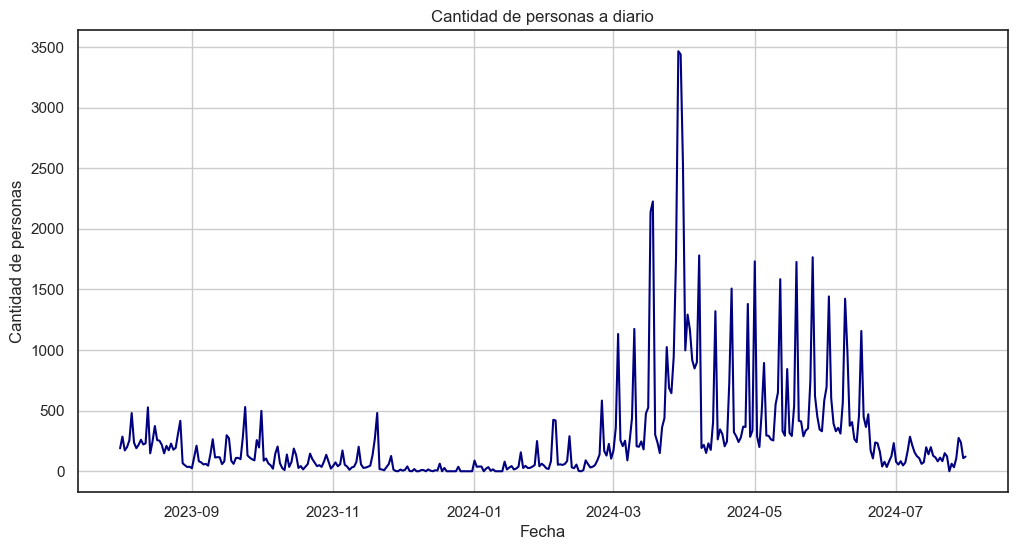

In [5]:
plt.plot(df.fecha, df.asistentes_totales, c = 'navy')
plt.title('Cantidad de personas a diario')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de personas')
plt.grid()

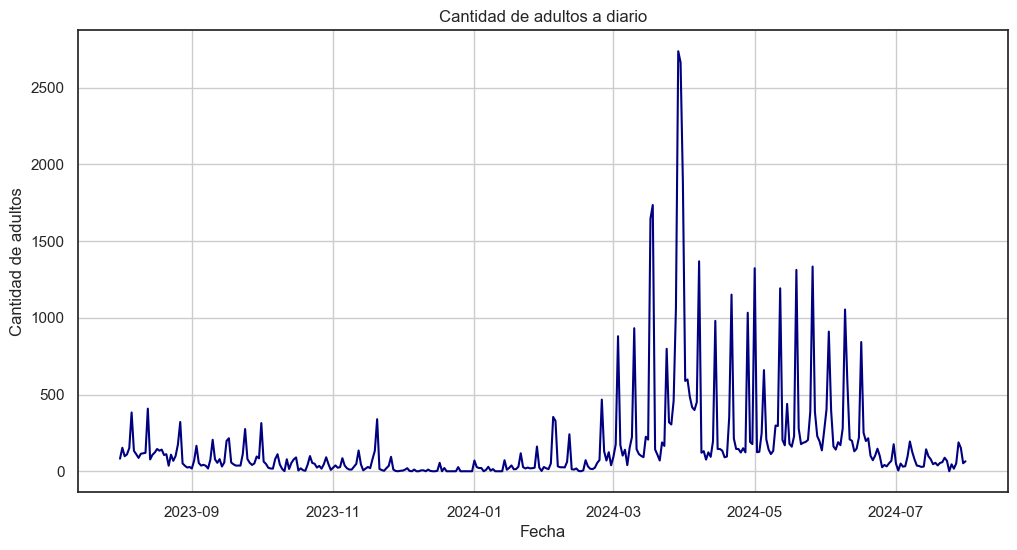

In [6]:
plt.plot(df.fecha, df.cantidad_adultos, c = 'navy')
plt.title('Cantidad de adultos a diario')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de adultos')
plt.grid()

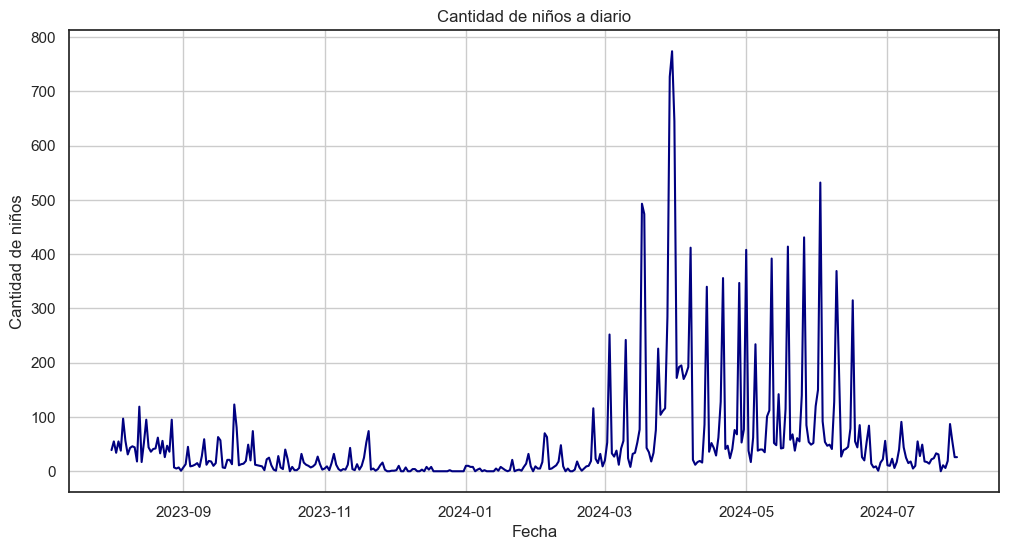

In [7]:
plt.plot(df.fecha, df.cantidad_niños, c = 'navy')
plt.title('Cantidad de niños a diario')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de niños')
plt.grid()

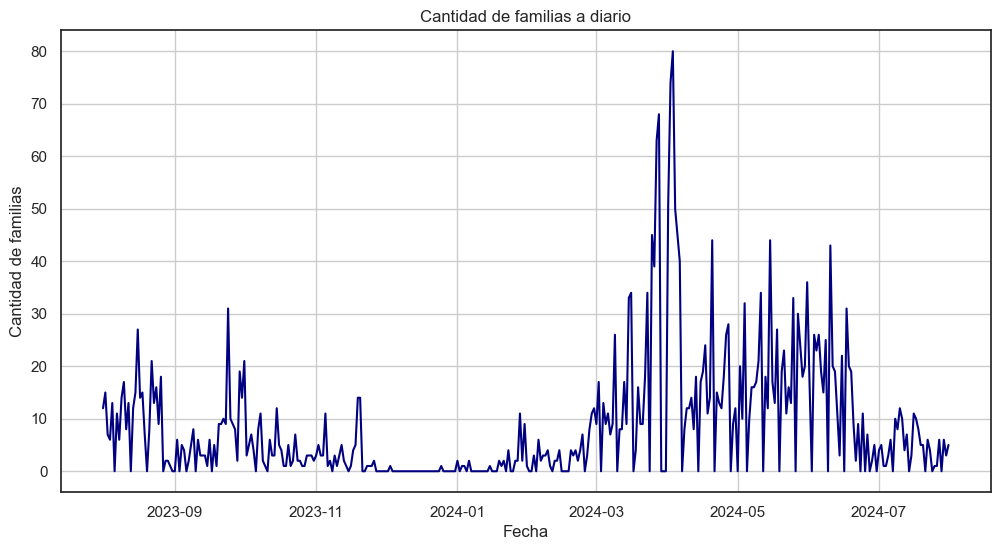

In [8]:
plt.plot(df.fecha, df.cantidad_familia, c = 'navy')
plt.title('Cantidad de familias a diario')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de familias')
plt.grid()

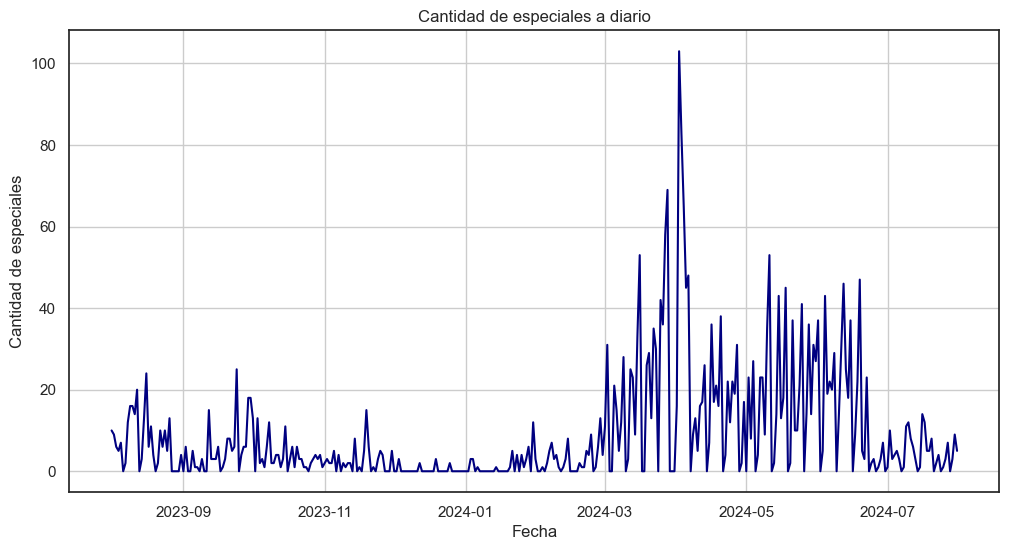

In [9]:
plt.plot(df.fecha, df.cantidad_especial, c = 'navy')
plt.title('Cantidad de especiales a diario')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de especiales')
plt.grid()

### Asistencias promedio diaria por mes

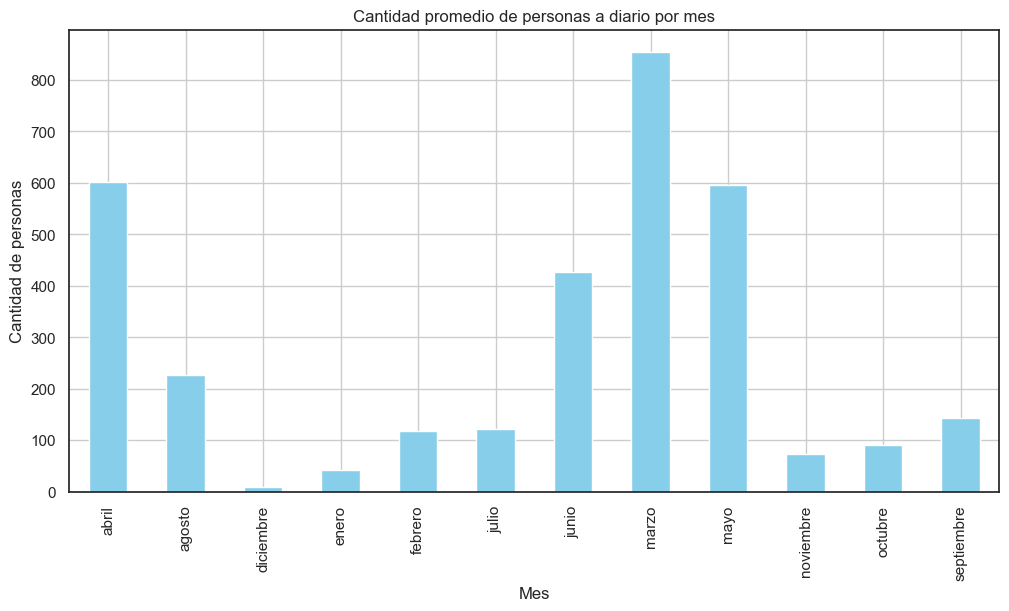

In [10]:
df.groupby('mes')['asistentes_totales'].mean().plot(kind='bar', color='skyblue')
plt.title('Cantidad promedio de personas a diario por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de personas')
plt.grid()

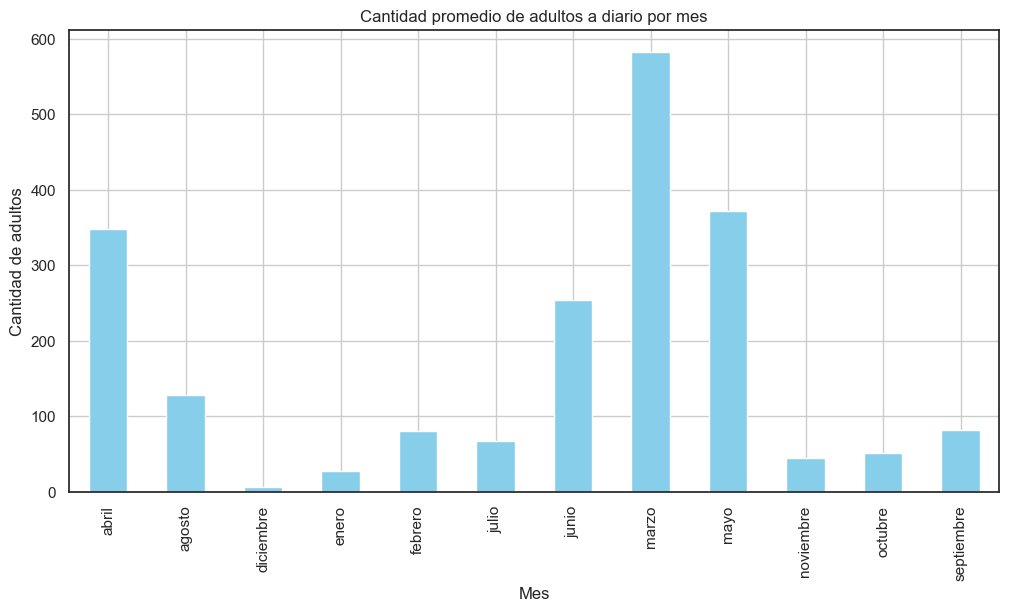

In [11]:
df.groupby('mes')['cantidad_adultos'].mean().plot(kind='bar', color='skyblue')
plt.title('Cantidad promedio de adultos a diario por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de adultos')
plt.grid()

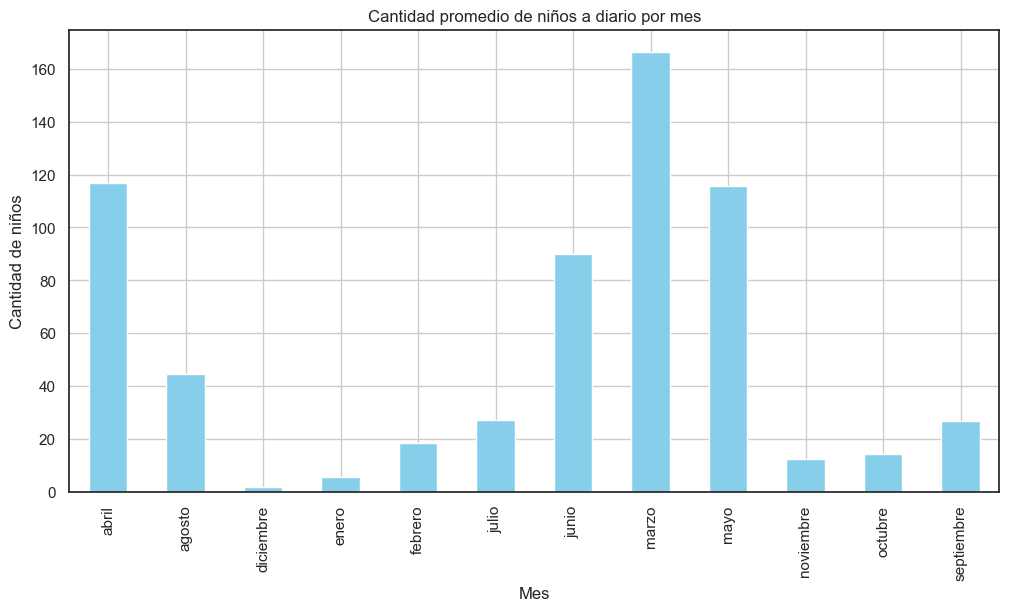

In [12]:
df.groupby('mes')['cantidad_niños'].mean().plot(kind='bar', color='skyblue')
plt.title('Cantidad promedio de niños a diario por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de niños')
plt.grid()

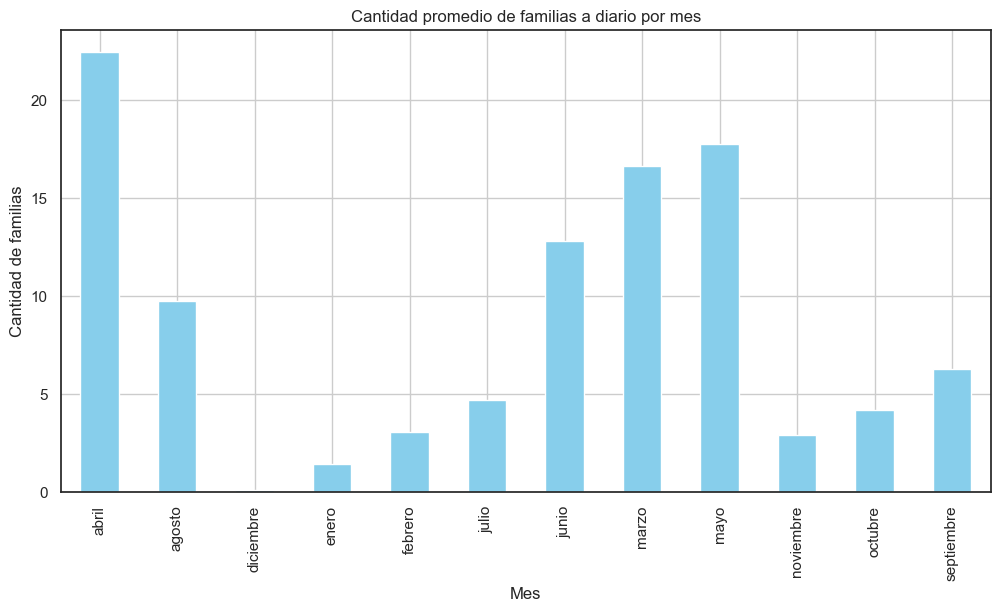

In [13]:
df.groupby('mes')['cantidad_familia'].mean().plot(kind='bar', color='skyblue')
plt.title('Cantidad promedio de familias a diario por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de familias')
plt.grid()

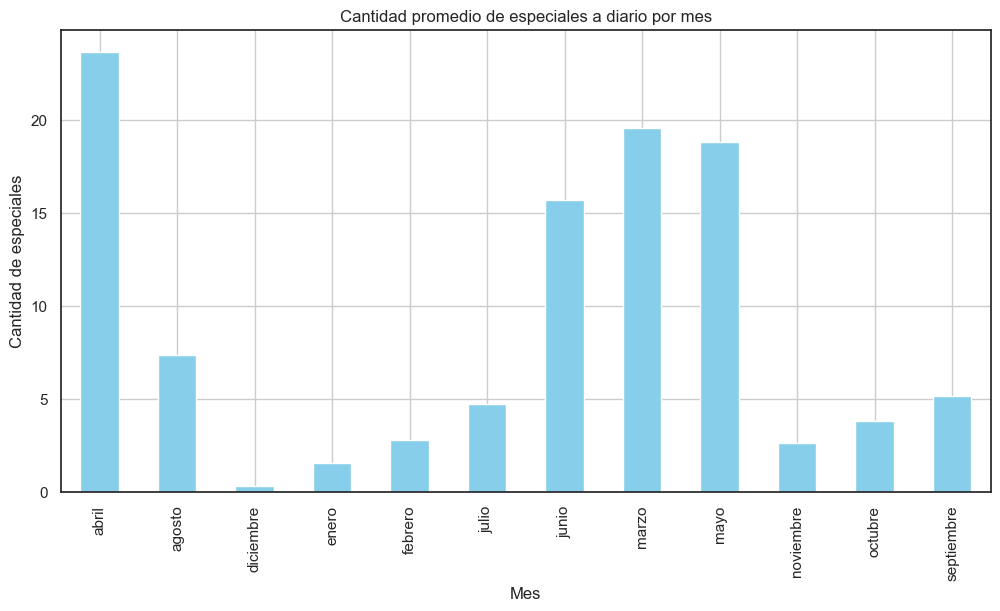

In [14]:
df.groupby('mes')['cantidad_especial'].mean().plot(kind='bar', color='skyblue')
plt.title('Cantidad promedio de especiales a diario por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de especiales')
plt.grid()

## Ingresos

### Ingresos por entradas

In [15]:
fig = px.line(df, x='fecha', y='ingreso_entrada', title='Ingreso por entradas a diario')
fig.update_layout(
    width=1200,  
    height=600  
)
fig.update_traces(line=dict(color='navy'))
fig.show()

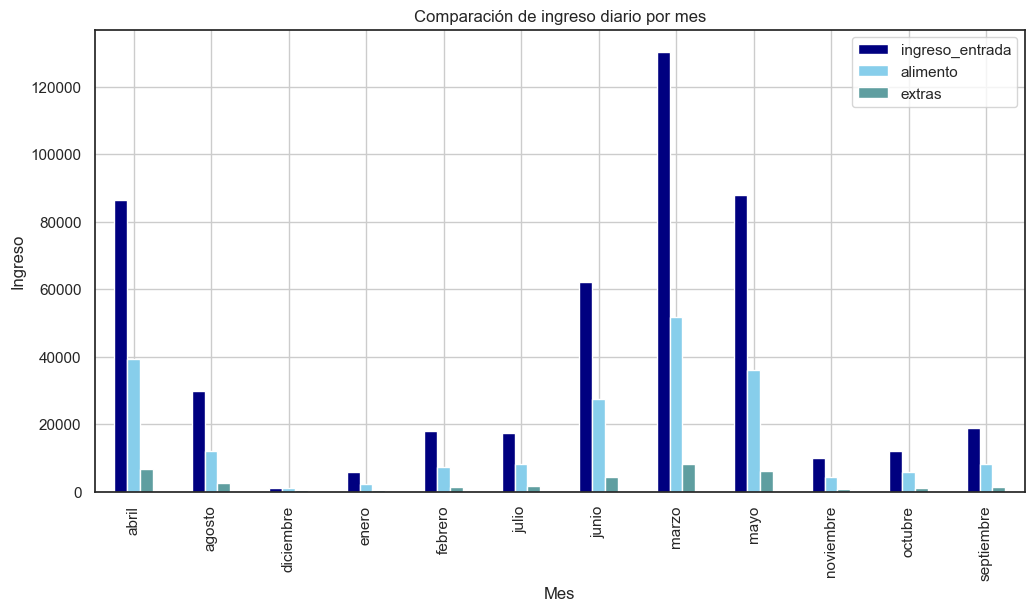

In [16]:
df.groupby('mes')['ingreso_entrada','alimento','extras'].mean().plot(kind='bar', color=['navy','skyblue','cadetblue'])
plt.title('Comparación de ingreso diario por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.grid()

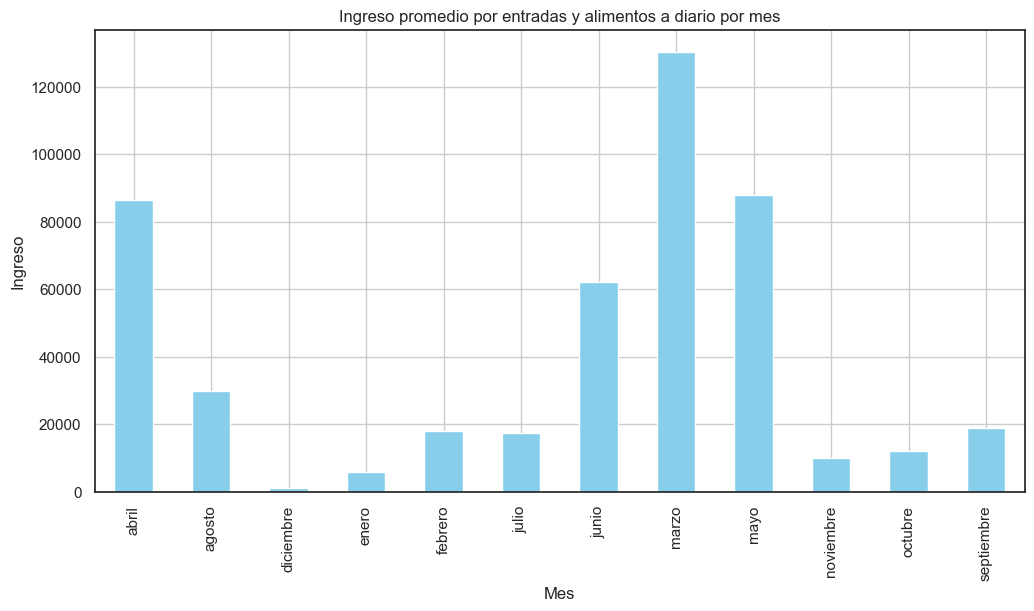

In [17]:
df.groupby('mes')['ingreso_entrada'].mean().plot(kind='bar', color=['skyblue'])
plt.title('Ingreso promedio por entradas y alimentos a diario por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.grid()

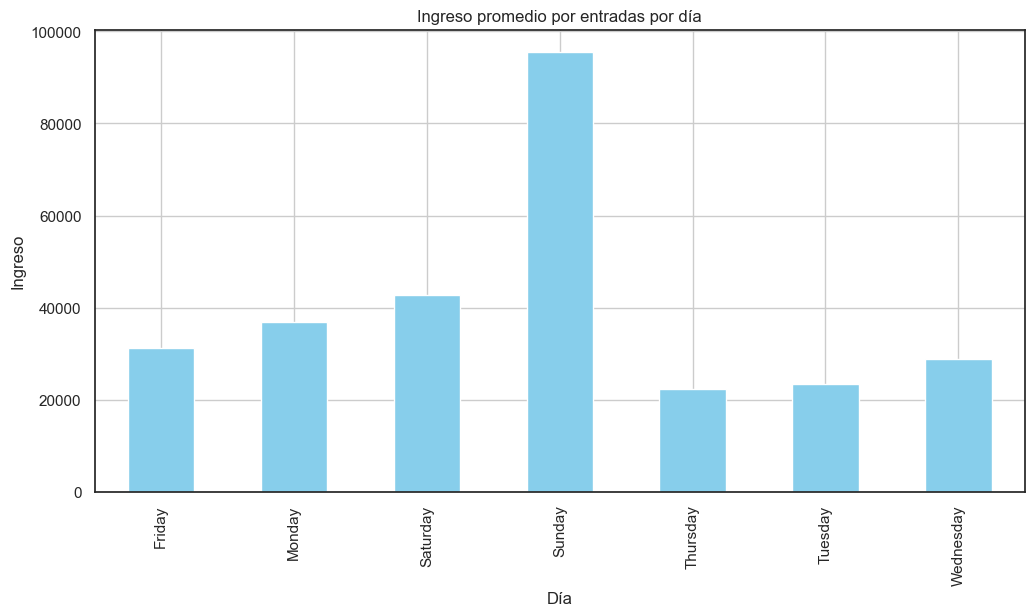

In [18]:
df.groupby('día')['ingreso_entrada'].mean().plot(kind='bar', color='skyblue')
plt.title('Ingreso promedio por entradas por día')
plt.xlabel('Día')
plt.ylabel('Ingreso')
plt.grid()

### Ingreso por alimentos

In [19]:
fig = px.line(df, x='fecha', y='alimento', title='Ingreso por comida a diario')
fig.update_layout(
    width=1200,  
    height=600  
)
fig.update_traces(line=dict(color='navy'))
fig.show()

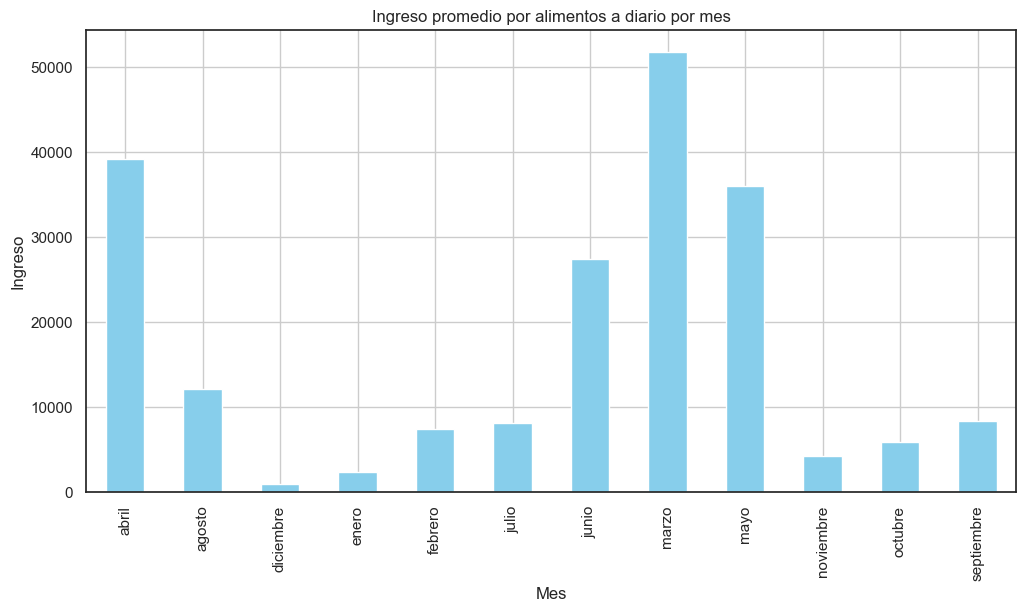

In [20]:
df.groupby('mes')['alimento'].mean().plot(kind='bar', color='skyblue')
plt.title('Ingreso promedio por alimentos a diario por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.grid()

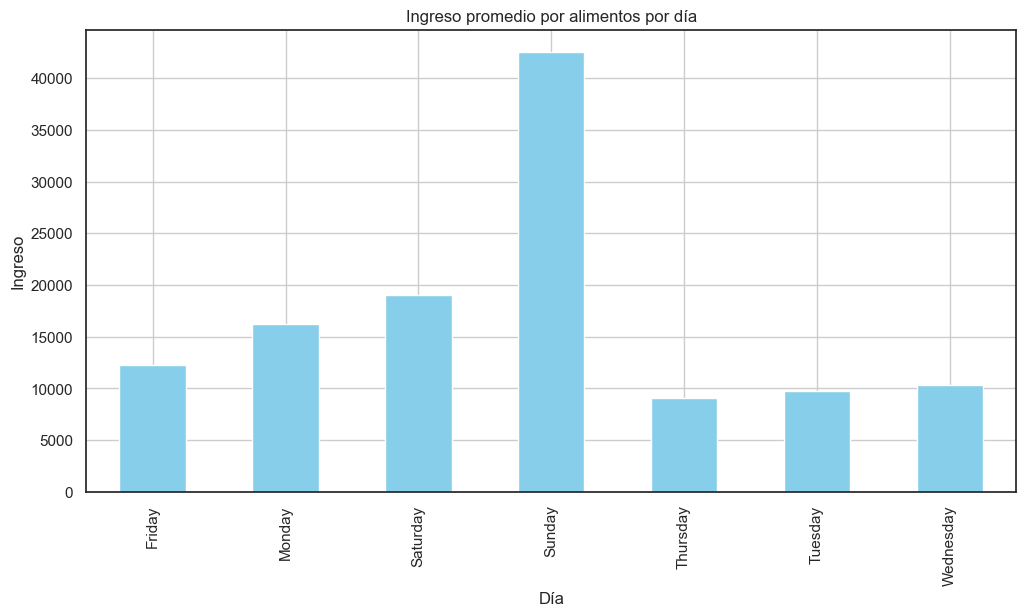

In [21]:
df.groupby('día')['alimento'].mean().plot(kind='bar', color='skyblue')
plt.title('Ingreso promedio por alimentos por día')
plt.xlabel('Día')
plt.ylabel('Ingreso')
plt.grid()

### Ingresos totales

In [22]:
fig = px.line(df, x='fecha', y='ingreso_total', title='Ingreso total a diario')
fig.update_layout(
    width=1200,  
    height=600  
)
fig.update_traces(line=dict(color='navy'))
fig.show()

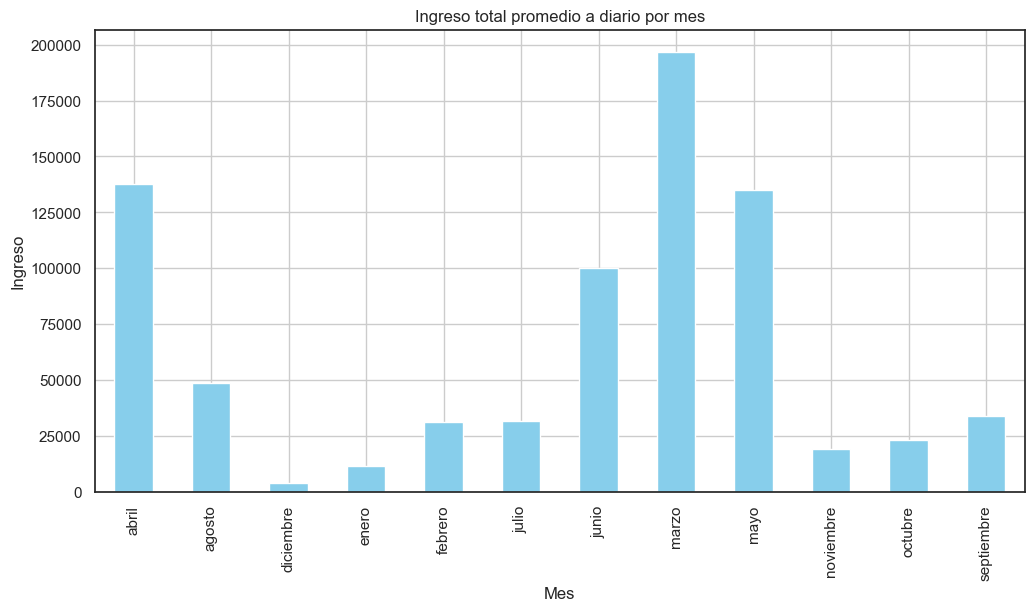

In [23]:
df.groupby('mes')['ingreso_total'].mean().plot(kind='bar', color='skyblue')
plt.title('Ingreso total promedio a diario por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.grid()

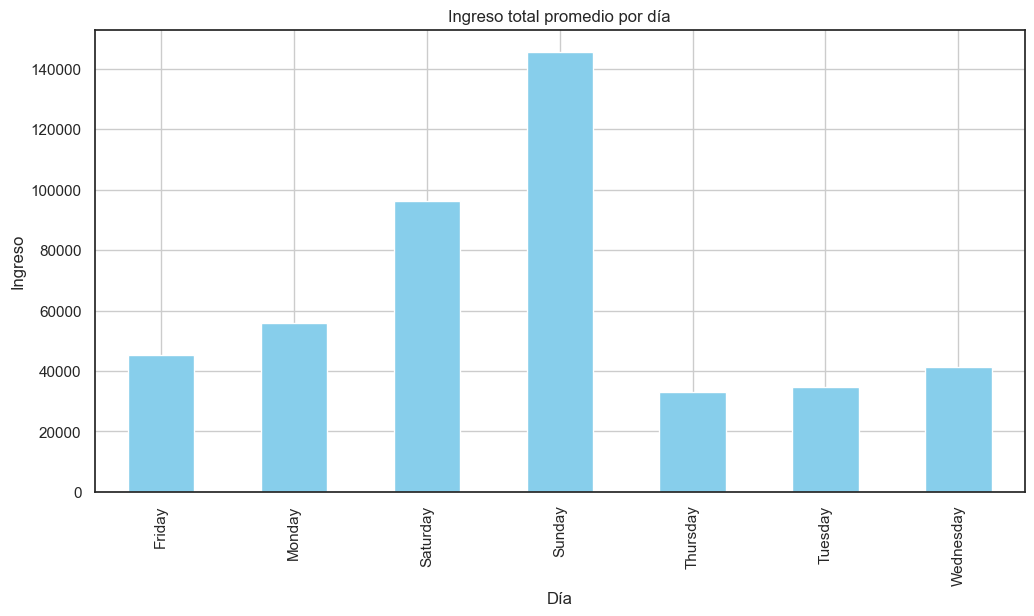

In [24]:
df.groupby('día')['ingreso_total'].mean().plot(kind='bar', color='skyblue')
plt.title('Ingreso total promedio por día')
plt.xlabel('Día')
plt.ylabel('Ingreso')
plt.grid()

## Neto

In [25]:
fig = px.line(df, x='fecha', y='neto', title='Neto diario')
fig.update_layout(
    width=1200,  
    height=600  
)
fig.update_traces(line=dict(color='navy'))
fig.show()

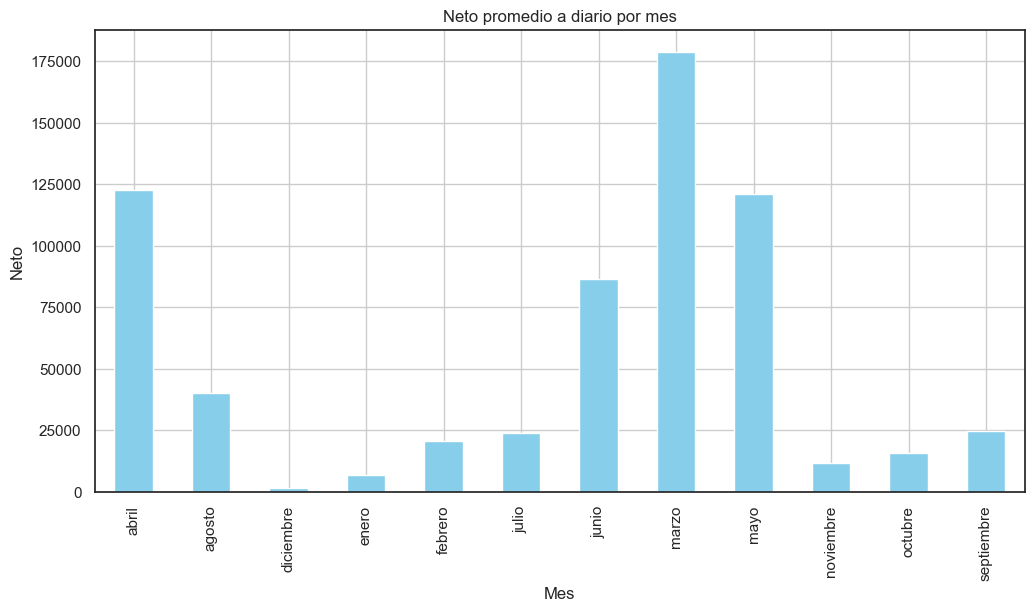

In [26]:
df.groupby('mes')['neto'].mean().plot(kind='bar', color='skyblue')
plt.title('Neto promedio a diario por mes')
plt.xlabel('Mes')
plt.ylabel('Neto')
plt.grid()

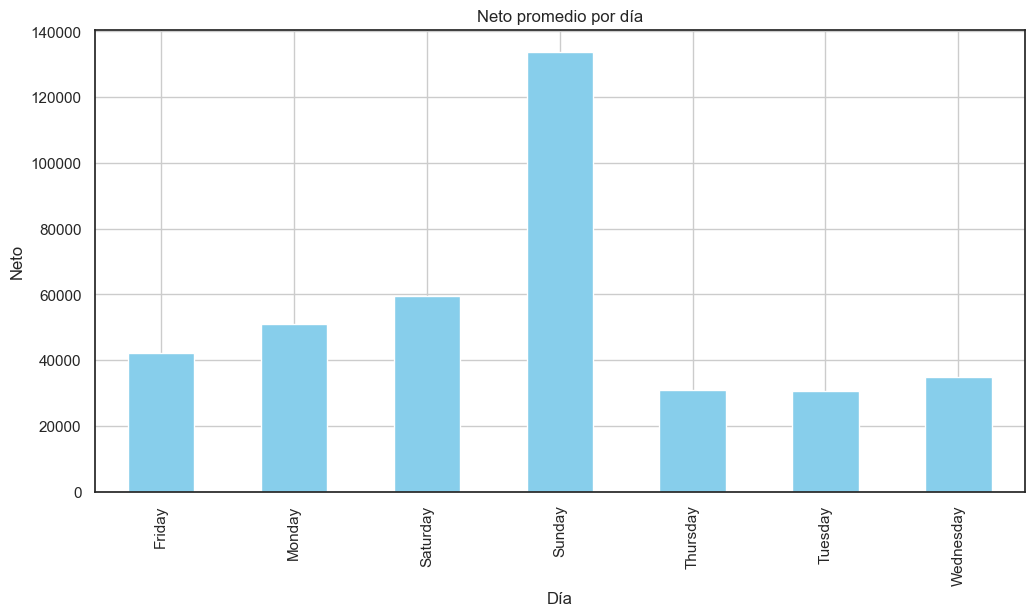

In [27]:
df.groupby('día')['neto'].mean().plot(kind='bar', color='skyblue')
plt.title('Neto promedio por día')
plt.xlabel('Día')
plt.ylabel('Neto')
plt.grid()

## Separación

### Ingreso total

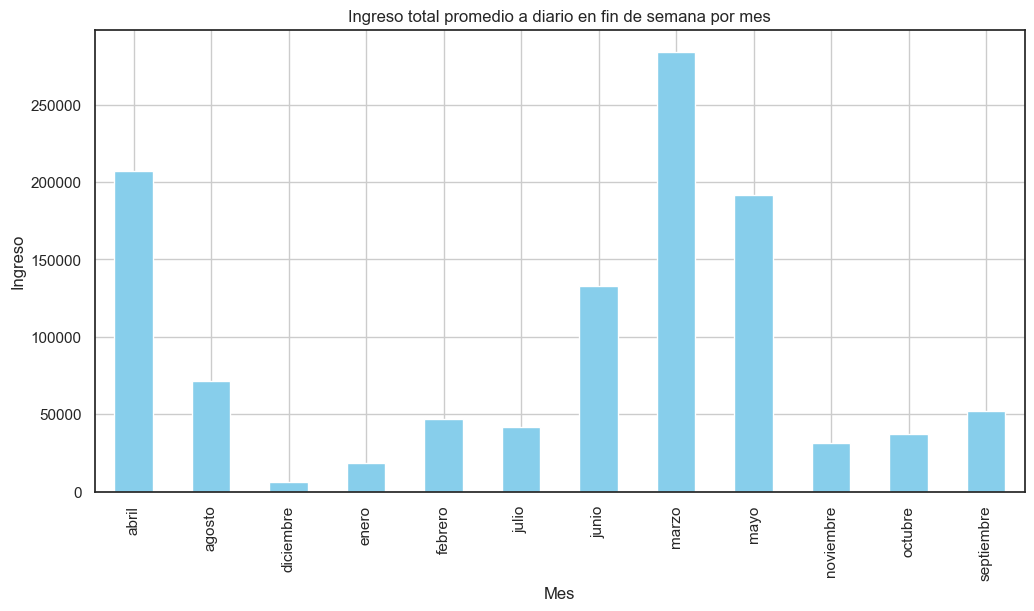

In [28]:
wknd = df.query("día == 'Friday' or día == 'Saturday' or día == 'Sunday'")
wd = df.query("día == 'Monday' or día == 'Tuesday' or día == 'Wednesday' or día == 'Thursday'")

wknd.groupby('mes')['ingreso_total'].mean().plot(kind='bar', color='skyblue')
plt.title('Ingreso total promedio a diario en fin de semana por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.grid()

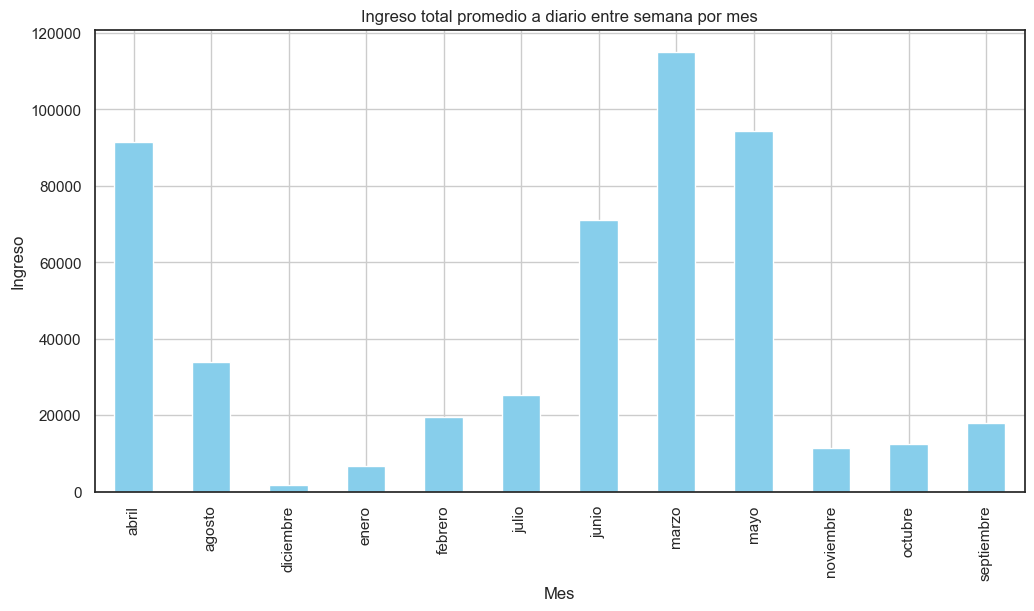

In [29]:
wd.groupby('mes')['ingreso_total'].mean().plot(kind='bar', color='skyblue')
plt.title('Ingreso total promedio a diario entre semana por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.grid()

### Asistencia total

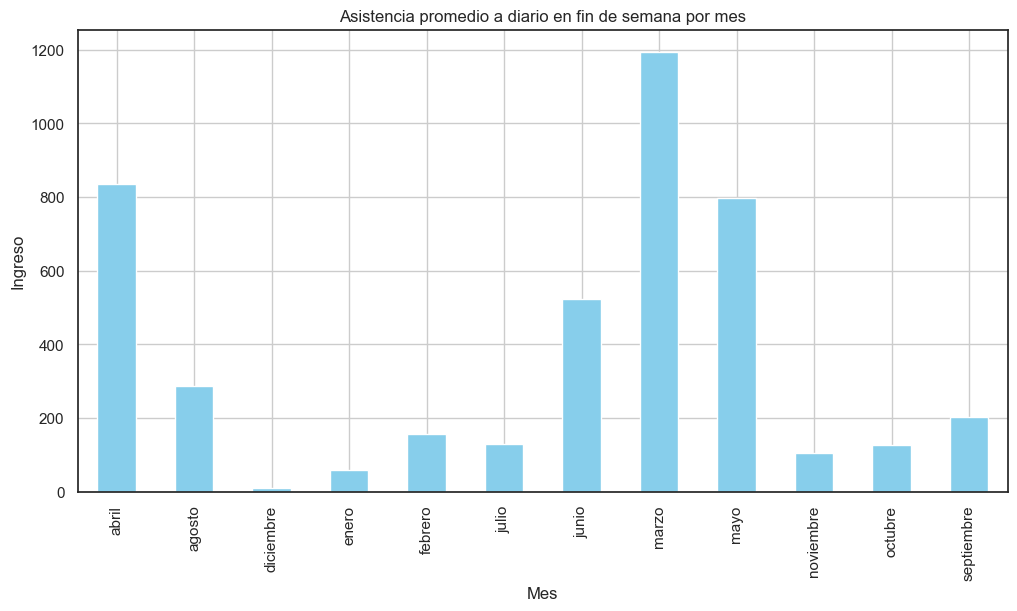

In [30]:
wknd.groupby('mes')['asistentes_totales'].mean().plot(kind='bar', color='skyblue')
plt.title('Asistencia promedio a diario en fin de semana por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.grid()

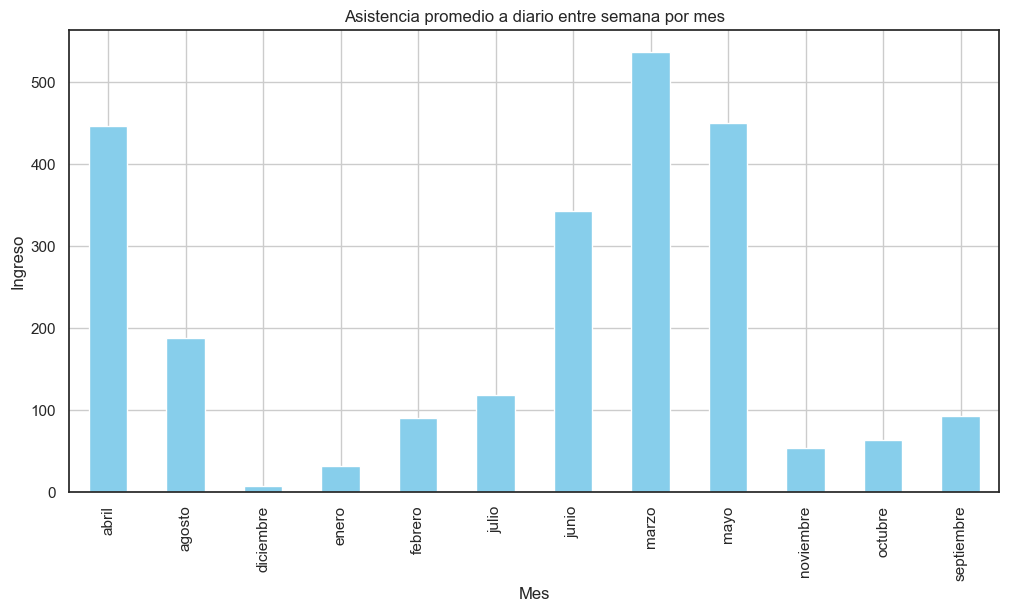

In [31]:
wd.groupby('mes')['asistentes_totales'].mean().plot(kind='bar', color='skyblue')
plt.title('Asistencia promedio a diario entre semana por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.grid()

## Correlación

In [32]:
df_trend = df[['temperatura_promedio','asistentes_totales']]

In [33]:
x_trend = df_trend['temperatura_promedio']
y_trend = df_trend['asistentes_totales']

X = x_trend.values.reshape(-1, 1)  # Reshape para hacerlo bidimensional
y = y_trend

model = LinearRegression().fit(X, y)
model.intercept_ ,model.coef_[0]

y_pred = model.predict(X)

df_trend['y_pred'] = y_pred

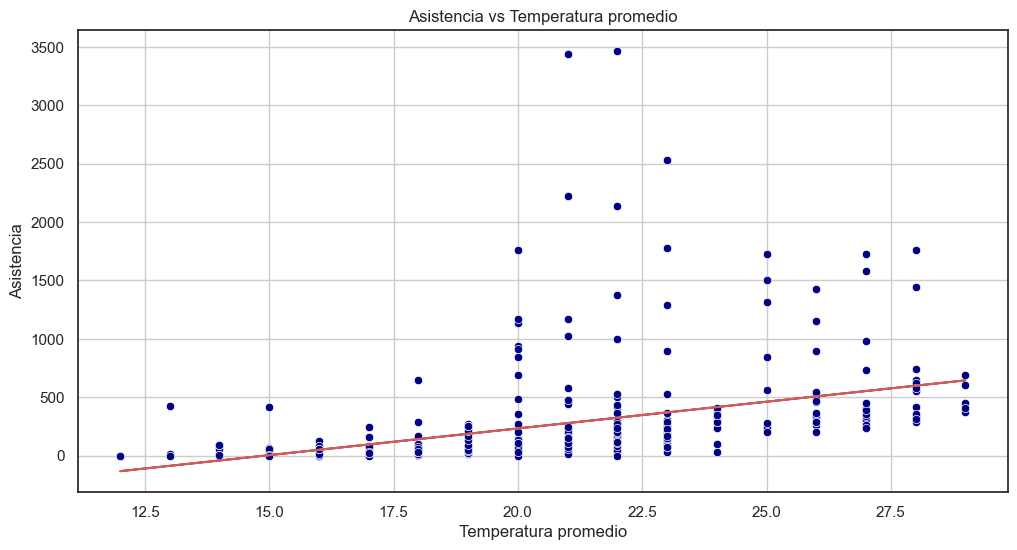

In [34]:
sns.scatterplot(x = df_trend.temperatura_promedio, y = df_trend.asistentes_totales, c = 'navy')
plt.plot(df_trend.temperatura_promedio, df_trend.y_pred, c = 'indianred')
plt.title('Asistencia vs Temperatura promedio')
plt.xlabel('Temperatura promedio')
plt.ylabel('Asistencia')
plt.grid()
plt.show()

In [35]:
df[['temperatura_promedio', 'asistentes_totales']].corr()

,temperatura_promedio,asistentes_totales
temperatura_promedio,1.000000,0.375123
asistentes_totales,0.375123,1.000000


## Clusters

### Estandarización de datos

In [36]:
# Separar variables numéricas y categóricas
numerical_features = ['ingreso_total','temperatura_promedio']
categorical_features = []

# Hacer las categóricas dummies
#encoded_features = pd.get_dummies(df[categorical_features], 
               #columns=categorical_features, 
               #drop_first=True)

# Estandarizar variables numéricas
data_to_model_standarized = StandardScaler().fit_transform(df[numerical_features])

# Hacer dataframe variables numéricas
data_to_model_df = pd.DataFrame(data_to_model_standarized, 
                                columns=numerical_features)

# Acomodar variables categóricas
#encoded_features_df = encoded_features.reset_index()

# Juntar ambas variables
#data_to_model = data_to_model_df.merge(encoded_features_df, on='index')
#data_to_model = data_to_model.drop('index', axis=1)
data_to_model_df

,ingreso_total,temperatura_promedio
0,-0.312582,0.293673
1,-0.108444,0.842061
2,-0.288119,0.293673
3,-0.266885,0.019478
4,0.166950,0.293673
...,...,...
361,-0.051567,-0.254716
362,-0.041669,0.293673
363,-0.156688,0.293673
364,-0.395866,0.293673


### Número óptimo de clusters

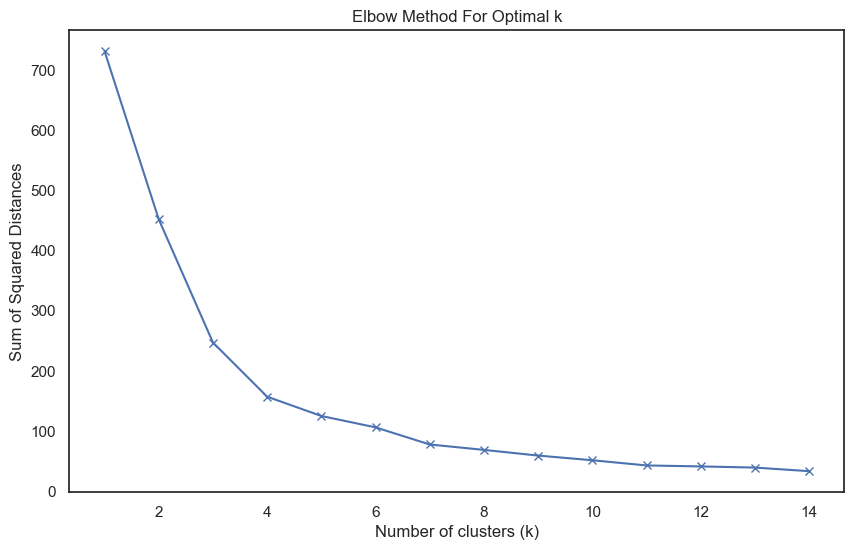

In [37]:
# Determinar el número óptimo de clusters usando el método del codo
sum_of_squared_distances = []
K = range(1, 15)  # Ajuste el rango según sea necesario
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(data_to_model_df)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
# Aplicar K-means clustering para identificar segmentos de clientes
kmeans = KMeans(n_clusters=4, random_state=42) 
labels = kmeans.fit_predict(data_to_model_df)

# Agregar las etiquetas del cluster al DataFrame original para análisis
data_to_model_df['Cluster'] = labels
df['Cluster'] = labels

### Visualización de clusters

In [39]:
def boxplot_clusters(columns):
    for col in columns:
        plt.figure(figsize=(5, 5))
        sns.boxplot(x='Cluster', y=col, data=df, hue='Cluster', palette='Set3')
        plt.title(f'Boxplot de {col} por Clusters')
        plt.show()

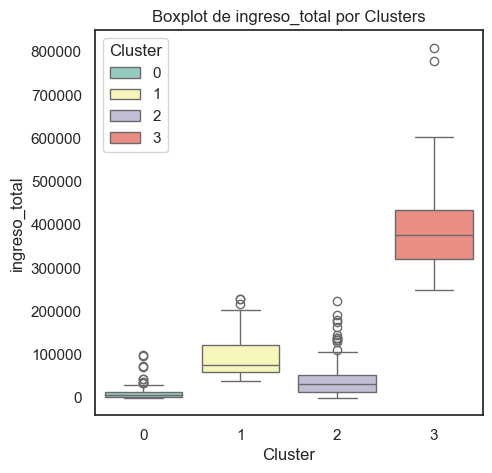

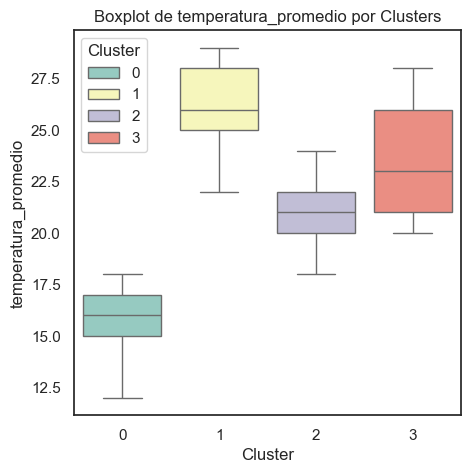

In [40]:
boxplot_clusters(numerical_features)

### Análisis de clusters

El rango de temperatura en el que se tiene la mayor cantidad de ingresos es apróximadamente de 21 a 26 grados Celsius. Si la temperatura sube o baja de este rango, los ingresos se ven reducidos. En este rango, los ingresos diarios del clúster se encuentran entre 320,000 y 450,000 pesos. Si la tempreratura sube de 26 grados, los ingresos bajan al rango de 80,000 a 120,000 pesos. El rango de temperaturas más bajas, que oscila entre los 15 a los 16.5 grados presenta los menores ingresos de todo el año.

## Regresión lineal

### Dummies arbitrarias

In [41]:
df['is_wknd'] = df['día'].isin(['Friday', 'Saturday', 'Sunday'])
df['is_hs'] = df['mes'].isin(['marzo', 'abril', 'mayo'])

columns_from_education = df.loc[:, 'is_wknd':].select_dtypes(include='bool').columns
df[columns_from_education] = df[columns_from_education].astype(int)

In [42]:
X = df[['temperatura_promedio','is_wknd','is_hs']]  
y = df['asistentes_totales'] 

In [43]:
# Agregar la constante (intercepto) a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo usando OLS
model = sm.OLS(y, X)       
results = model.fit()      

# Mostrar el resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     asistentes_totales   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           2.19e-33
Time:                        12:58:50   Log-Likelihood:                -2672.9
No. Observations:                 366   AIC:                             5354.
Df Residuals:                     362   BIC:                             5369.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -372.1470 

Hacemos una regresión lineal para predecir la cantidad de personas que asistirán al parque segun ciertas características y se oobtiene los siguiente:
- Temperatura promedio: Por cada unidad que se mueva la temperatura promedio del día afecta 21.7387 a la cantidad de personas.
- is_wknd: Esto significa que si es fin de semana se esperan 178.5335 personas.
- is_hs: Si es temporada alta (marzo, abril o mayo) se esperan 464.1459 personas.



El modelo tiene una $R^2$ de 0.348, por lo que explica muy poca variación de los datos pero también tiene un F-estadístico muy bajo lo que significa que al menos una de las variables impacta significativamente a la cantidad de asistentes.

In [44]:
new_day_data = {
    'const': [1], 
    'temperatura_promedio': [27],
    'is_wknd': [1],
    'is_hs': [1]
}

new_day_data = pd.DataFrame(new_day_data)

asistentes_predecidos = results.predict(new_day_data)

print(f"Asistentes predecidos del nuevo día: {asistentes_predecidos[0]:,.2f}")

Asistentes predecidos del nuevo día: 857.48


### Dummies de código

In [45]:
categorical_features = ['mes','día']
numerical_features = ['temperatura_promedio']

data_encoded = pd.get_dummies(df[['asistentes_totales'] + categorical_features], columns=categorical_features)

data_encoded['temperatura_promedio'] = df['temperatura_promedio']

df_to_model = data_encoded

In [46]:
X1 = df_to_model[['temperatura_promedio','mes_marzo','mes_abril','mes_mayo',
                'día_Sunday']]  
y1 = df_to_model['asistentes_totales'] 

In [47]:
# Agregar la constante (intercepto) a las variables independientes
X1 = sm.add_constant(X1)

# Ajustar el modelo usando OLS
model1 = sm.OLS(y1, X1)       
results1 = model1.fit()      

# Mostrar el resumen del modelo
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:     asistentes_totales   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     58.28
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           2.44e-44
Time:                        12:58:50   Log-Likelihood:                -2642.6
No. Observations:                 366   AIC:                             5297.
Df Residuals:                     360   BIC:                             5321.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -559.4356 

Hacemos una regresión lineal para predecir la cantidad de personas que asistirán al parque segun ciertas características y se oobtiene los siguiente:
- Temperatura promedio: Por cada unidad que se mueva la temperatura promedio del día afecta 32.0352 a la cantidad de personas.
- mes_marzo: Esto significa que si es marzo se esperan 681 personas.
- mes_abril: Esto significa que si es abril se esperan 354 personas.
- mes_mayo: Esto significa que si es mayo se esperan 246 personas.
- día_Sunday: Esto significa que si es domingo se esperan 400 personas.



El modelo tiene una $R^2$ de 0.447, por lo que explica casi la mitad de la variación de los datos, también tiene un F-estadístico muy bajo lo que significa que al menos una de las variables impacta significativamente a la cantidad de asistentes. Cabe resaltar que está segunda regresión nos da un mejor modelo.

In [48]:
new_day_data1 = {
    'const': [1], 
    'temperatura_promedio': [27],
    'mes_marzo': [1],
    'mes_abril': [0],
    'mes_mayo' : [0],
    'día_Sunday' : [1]
}

new_day_data1 = pd.DataFrame(new_day_data1)

asistentes_predecidos1 = results1.predict(new_day_data1)

print(f"Asistentes predecidos del nuevo día: {asistentes_predecidos1[0]:,.2f}")

Asistentes predecidos del nuevo día: 1,387.38


### Regresión semanal

In [49]:
df['semana'] = pd.Categorical(df['semana'], categories=[
    'semana 1', 'semana 2', 'semana 3', 'semana 4', 'semana 5', 'semana 6', 'semana 7', 'semana 8', 'semana 9', 'semana 10',
    'semana 11', 'semana 12', 'semana 13', 'semana 14', 'semana 15', 'semana 16', 'semana 17', 'semana 18', 'semana 19', 'semana 20',
    'semana 21', 'semana 22', 'semana 23', 'semana 24', 'semana 25', 'semana 26', 'semana 27', 'semana 28', 'semana 29', 'semana 30',
    'semana 31', 'semana 32', 'semana 33', 'semana 34', 'semana 35', 'semana 36', 'semana 37', 'semana 38', 'semana 39', 'semana 40',
    'semana 41', 'semana 42', 'semana 43', 'semana 44', 'semana 45', 'semana 46', 'semana 47', 'semana 48', 'semana 49', 'semana 50',
    'semana 51', 'semana 52', 'semana 53'
], ordered=True)
df_prom_suma = df.groupby('semana')['temperatura_promedio'].mean()
df_prom_suma.head()

df_suma = df.groupby('semana')['asistentes_totales','nomina'].sum()

df_semanal = pd.concat([df_prom_suma, df_suma], axis=1)

In [50]:
X_semanal = df_semanal[['temperatura_promedio','nomina']].reset_index(drop=True) 
y_semanal = df_semanal['asistentes_totales'].reset_index(drop=True) 

# Agregar la constante (intercepto) a las variables independientes
X_semanal = sm.add_constant(X_semanal)

# Ajustar el modelo usando OLS
model_semanal= sm.OLS(y_semanal, X_semanal)       
results_semanal = model_semanal.fit()      

# Mostrar el resumen del modelo
print(results_semanal.summary())

                            OLS Regression Results                            
Dep. Variable:     asistentes_totales   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     13.36
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           2.25e-05
Time:                        12:58:50   Log-Likelihood:                -473.18
No. Observations:                  53   AIC:                             952.4
Df Residuals:                      50   BIC:                             958.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4889.0448 

Hacemos una regresión lineal para predecir la cantidad de personas que asistirán al parque segun ciertas la temperatura promedio semanal y la cantidad total pagada por semana y se obtiene los siguiente:

- Temperatura promedio: Por cada unidad que se mueva la temperatura promedio de la semana afecta en 252.5091 a la cantidad de asistentes en dicha semana.
- Cantidad total pagada en nómina por semana: Por cada unidad que se mueva la aantidad total pagada en nómina por semana afecta en 0.0560 a la cantidad de asistentes en dicha semana.

Estos coeficientes son de esta manera debido al rango de valores de cada una de las variables, en el caso de la temperatura promedio, esta se encuentra en promedio entre los 15 y los 27 grados Celsius, mientras que la cantidad pagada en nómina se encuentra entre los 15,000 y los 30,000 pesos, la mayoría de lo valores estando entre los 30,000 y los 40,000 pesos. Es por esta gran diferenica entre los valores de las variables que los coeficientes son tan diferentes.


El modelo tiene una $R^2$ de 0.345, por lo que explica muy poca variación de los datos pero también tiene un F-estadístico muy bajo lo que significa que al menos una de las variables impacta significativamente a la cantidad de asistentes.

In [51]:
new_day_data_semanal = {
    'const': [1], 
    'temperatura_promedio': [25],
    'nomina': [15000]
}

new_day_data_semanal = pd.DataFrame(new_day_data_semanal)

asistentes_predecidos_semanal = results_semanal.predict(new_day_data_semanal)

print(f"Asistentes predecidos del nuevo día: {asistentes_predecidos_semanal[0]:,.2f}")

Asistentes predecidos del nuevo día: 2,263.39


## Predicción con series de tiempo

### Datos

In [52]:
df_ts = df[['fecha','asistentes_totales']]
df_ts.set_index('fecha', inplace=True)
df_ts.head()

,asistentes_totales
fecha,
2023-08-01,189
2023-08-02,286
2023-08-03,172
2023-08-04,199
2023-08-05,255


### Definición del Modelo

In [53]:
model_ts = auto_timeseries(
    score_type='rmse',       # Métrica de evaluación
    time_interval='D',       # Intervalo diario
    non_seasonal_pdq=None,   # Para modelos SARIMAX
    seasonality=False,       # Deshabilitar búsqueda de estacionalidad (se puede cambiar)
    model_type='best',       # Seleccionar el mejor modelo
    verbose=2                # Nivel de verbosidad
)
# ['best', 'prophet', 'stats', 'ml', 'arima', 'ARIMA', 'Prophet', 'SARIMAX', 'VAR', 'ML']

Start of Fit.....
    Target variable given as = asistentes_totales
Start of loading of data.....
    Inputs: ts_column = fecha, sep = ,, target = ['asistentes_totales']
    Using given input: pandas dataframe...
    train time series fecha column is the index on test data...
    train data shape = (274, 1)
Alert: Could not detect strf_time_format of fecha. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


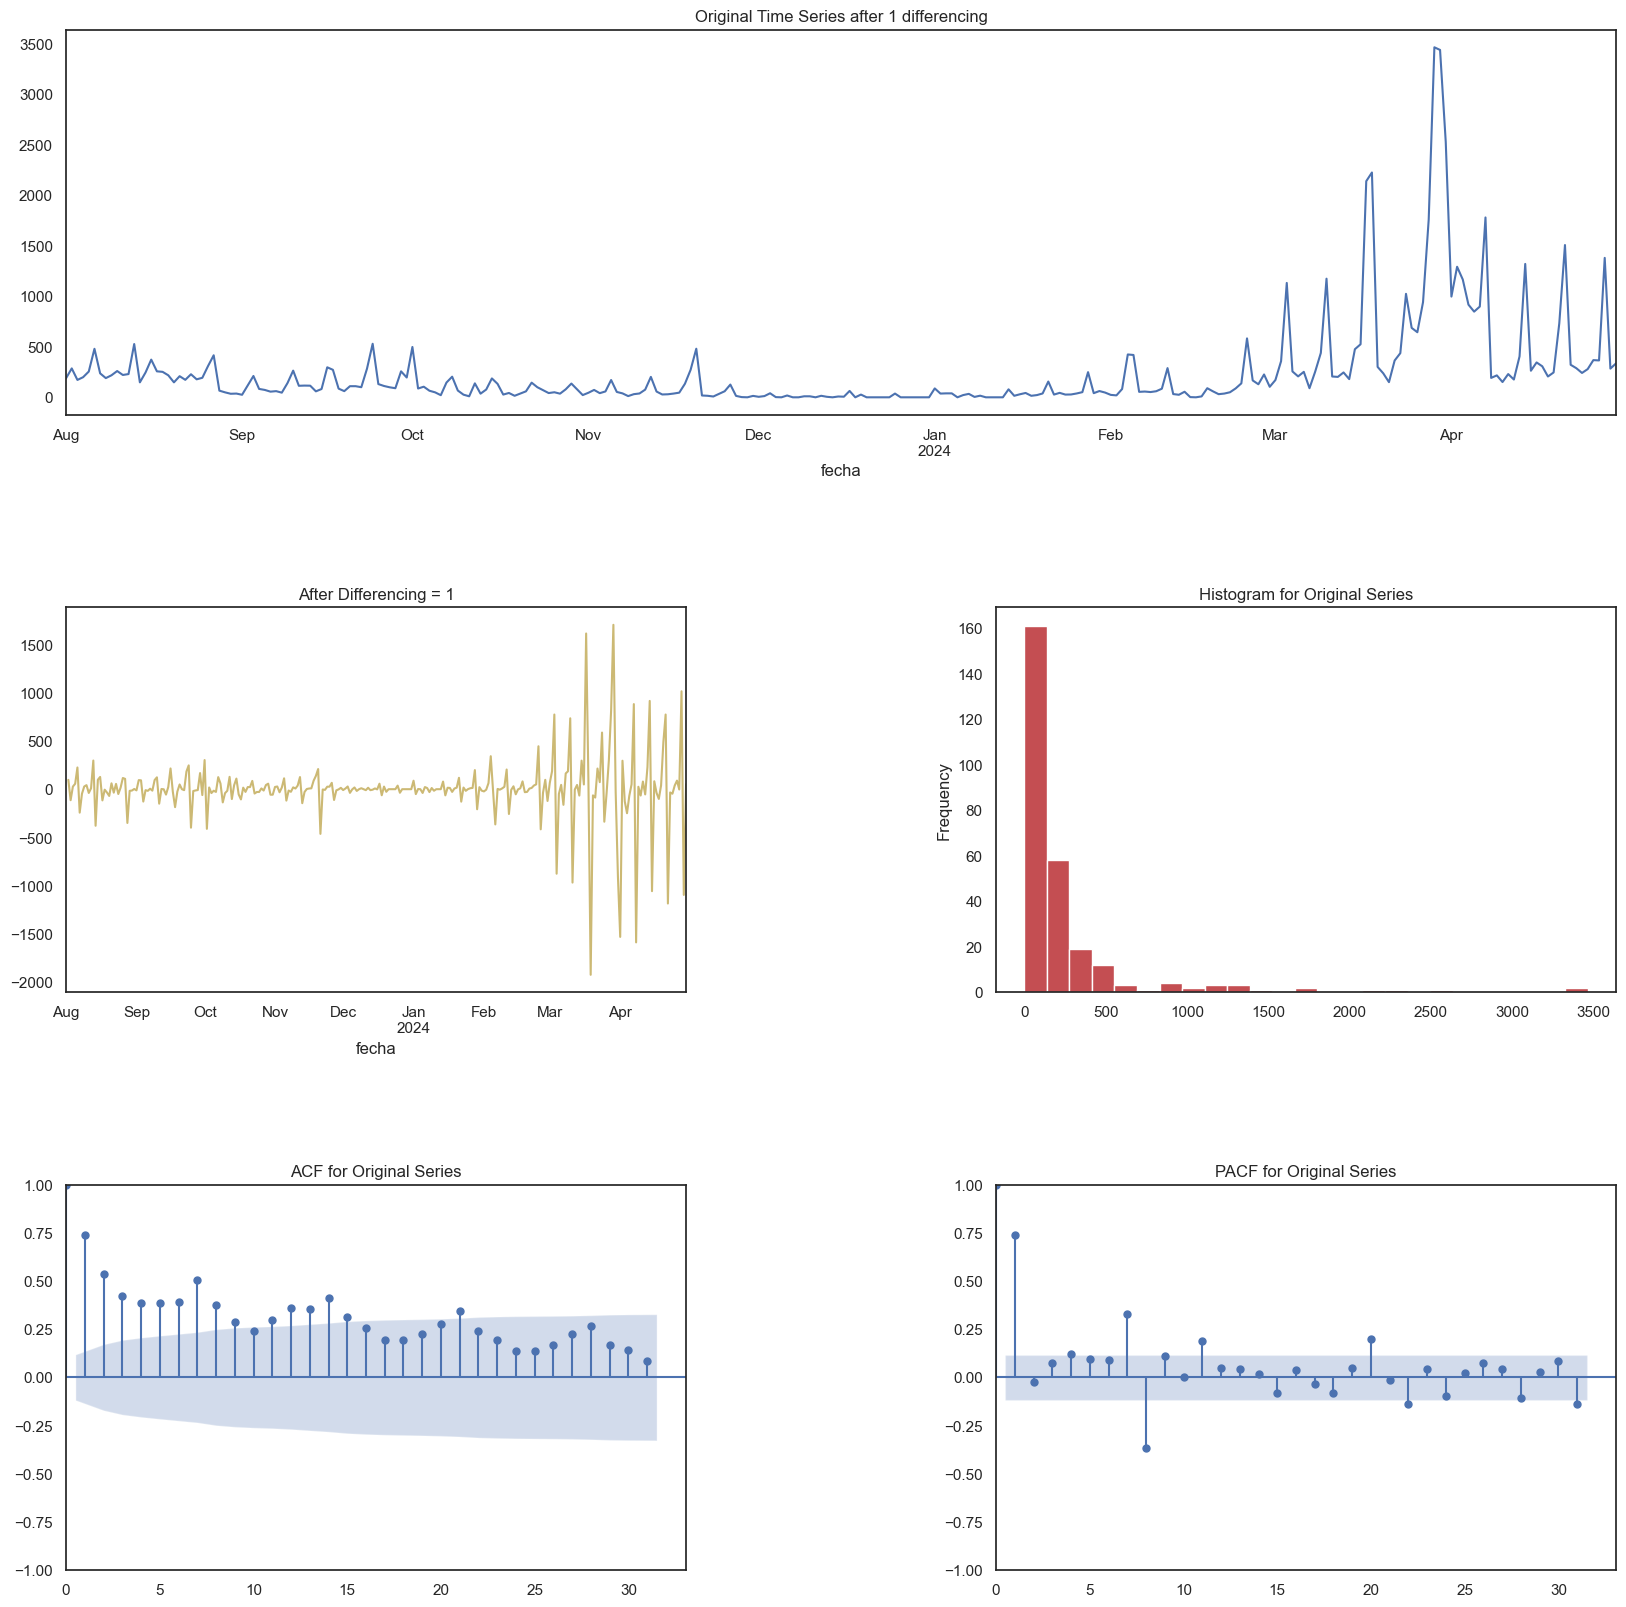

12:58:51 - cmdstanpy - INFO - Chain [1] start processing
12:58:51 - cmdstanpy - INFO - Chain [1] done processing
12:58:51 - cmdstanpy - INFO - Chain [1] start processing
12:58:51 - cmdstanpy - INFO - Chain [1] done processing


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(274, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 249 Test Shape: 5
    RMSE = 740.77
    Std Deviation of actuals = 630.02
    Normalized RMSE (as pct of std dev) = 118%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 254 Test Shape: 5
    RMSE = 708.64
    Std Deviation of actuals = 427.37
    Normalized RMSE (as pct of std dev) = 166%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 259 Test Shape: 5


12:58:51 - cmdstanpy - INFO - Chain [1] start processing
12:58:51 - cmdstanpy - INFO - Chain [1] done processing
12:58:51 - cmdstanpy - INFO - Chain [1] start processing
12:58:51 - cmdstanpy - INFO - Chain [1] done processing
12:58:51 - cmdstanpy - INFO - Chain [1] start processing
12:58:51 - cmdstanpy - INFO - Chain [1] done processing
12:58:51 - cmdstanpy - INFO - Chain [1] start processing
12:58:51 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 578.77
    Std Deviation of actuals = 189.00
    Normalized RMSE (as pct of std dev) = 306%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 264 Test Shape: 5
    RMSE = 525.90
    Std Deviation of actuals = 490.48
    Normalized RMSE (as pct of std dev) = 107%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 269 Test Shape: 5
    RMSE = 463.17
    Std Deviation of actuals = 417.79
    Normalized RMSE (as pct of std dev) = 111%
Cross Validation window: 5 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 568.64
    MSE (Mean Squared Error = 375395.31
    MAPE (Mean Absolute Percent Error) = 213%
    RMSE (Root Mean Squared Error) = 612.6951
    Normalized RMSE (MinMax) = 38%
    Normalized RMSE (as Std Dev of Actuals)= 130%
Time Taken = 0 seconds
  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Mode

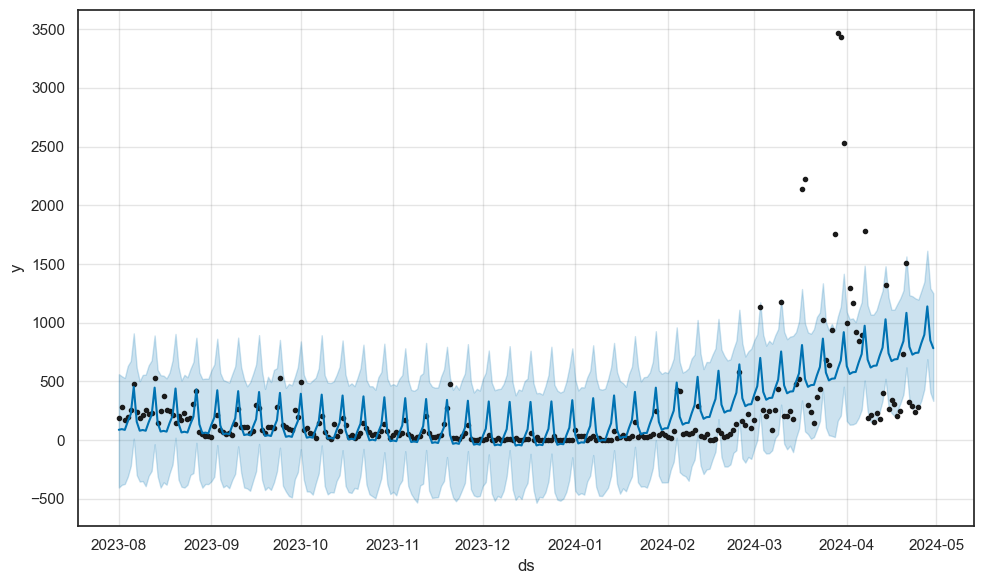

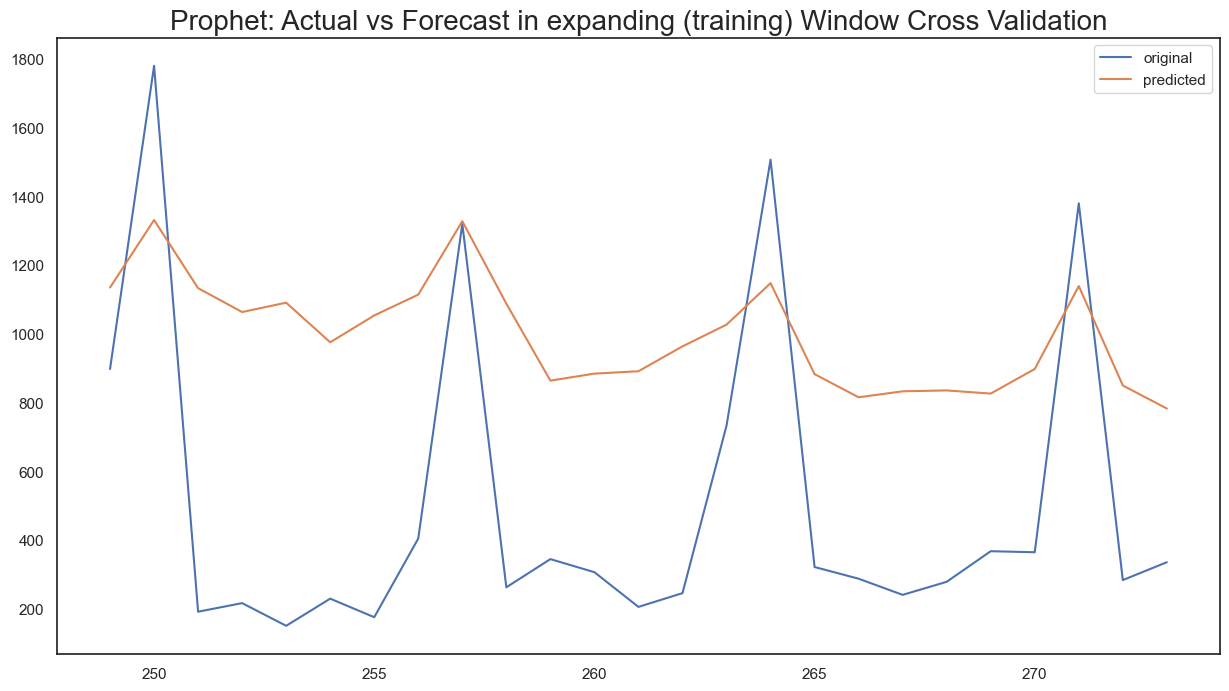

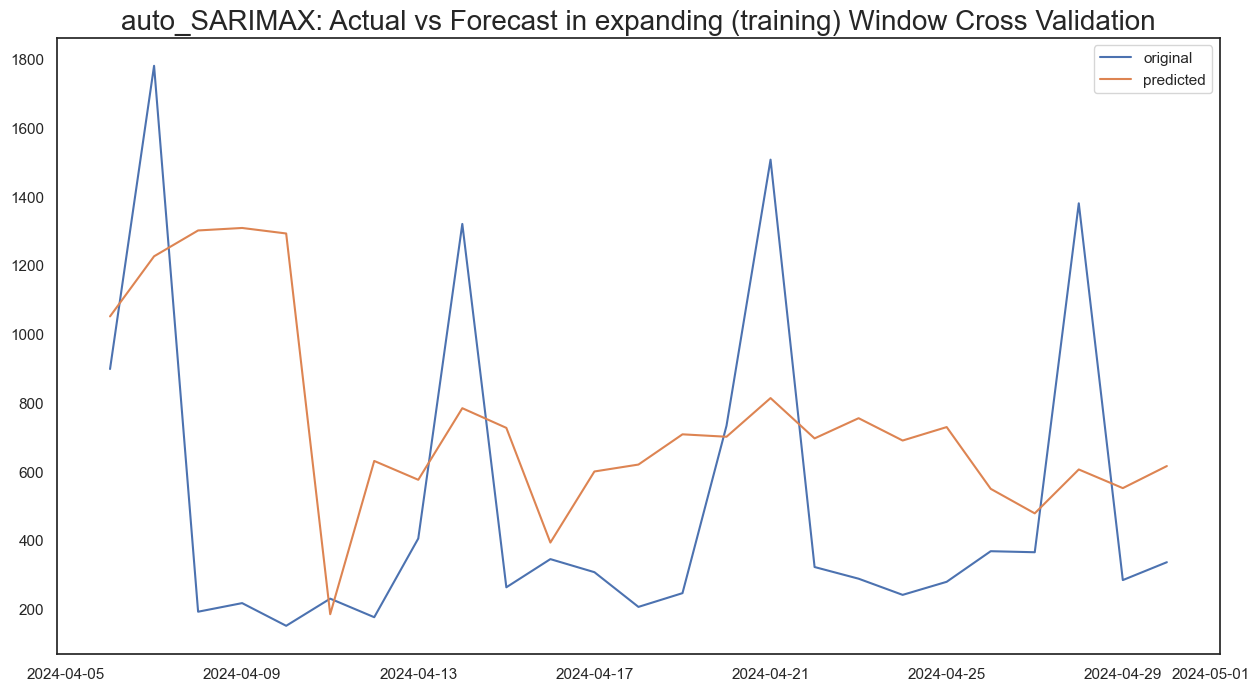

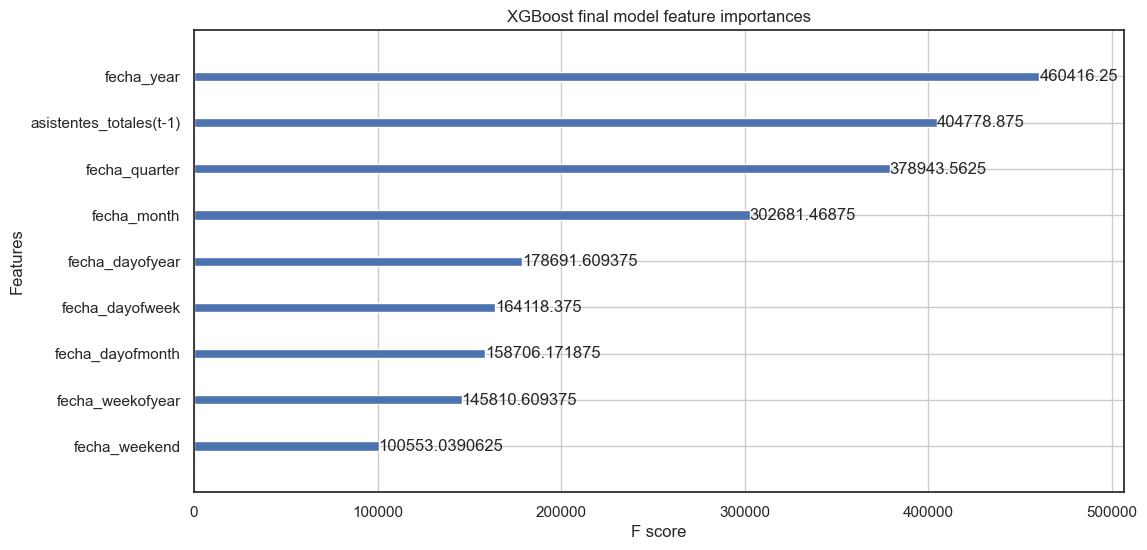

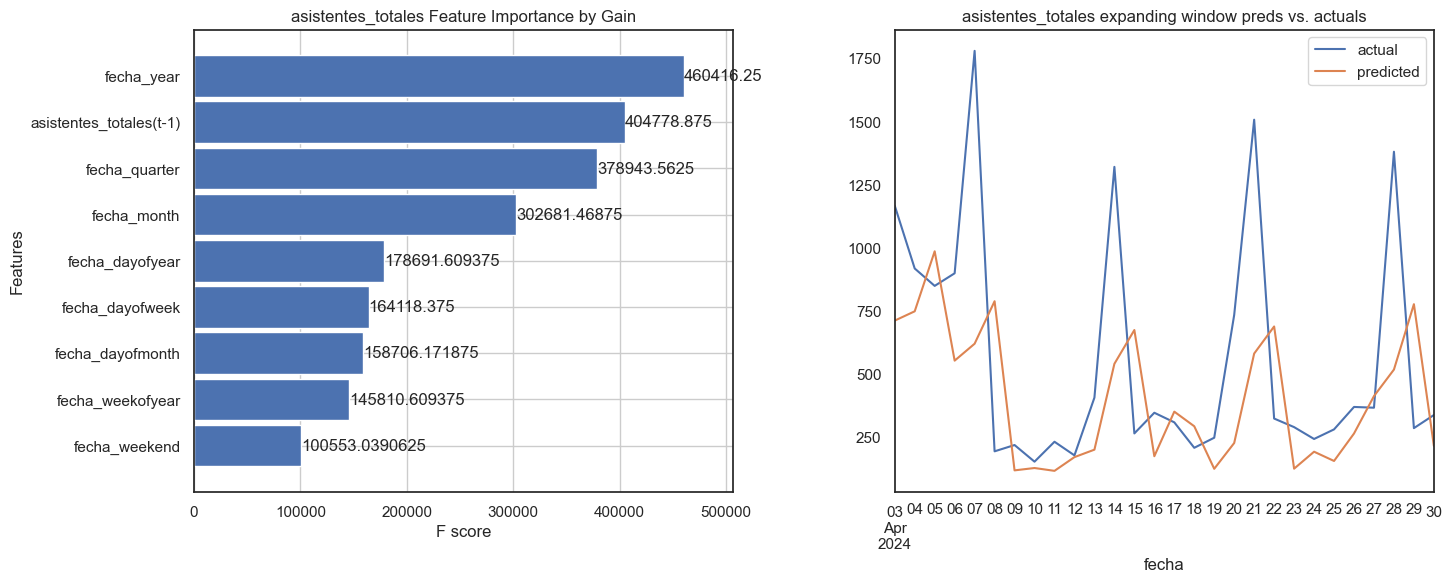

In [54]:
train_size = int(0.75 * len(df_ts))
train_df = df_ts[:train_size]
test_df = df_ts[train_size:]

model_ts.fit(
    traindata=train_df,
    ts_column=train_df.index.name,
    target='asistentes_totales'
)

### Test

In [55]:
forecast = model_ts.predict(testdata=test_df)
forecast

Predicting using test dataframe shape = (92, 1) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for fecha. Provide strf_time format during "setup" for better results.
ML predictions completed


,yhat,mean_se,mean_ci_lower,mean_ci_upper
fecha,,,,
2024-05-01,675.981689,NaN,NaN,NaN
2024-05-02,1215.401978,NaN,NaN,NaN
2024-05-03,716.235901,NaN,NaN,NaN
2024-05-04,738.473511,NaN,NaN,NaN
2024-05-05,1187.199951,NaN,NaN,NaN
...,...,...,...,...
2024-07-27,552.684204,NaN,NaN,NaN
2024-07-28,826.076599,NaN,NaN,NaN
2024-07-29,568.383362,NaN,NaN,NaN


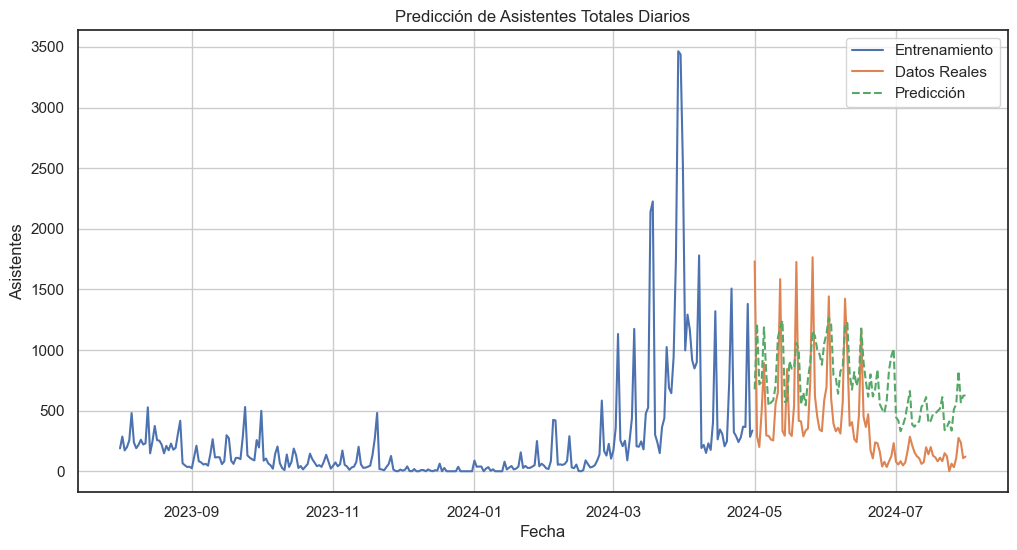

RMSE en el conjunto de prueba: 455.28


In [56]:
plt.figure(figsize=(12,6))
plt.plot(train_df.index, train_df['asistentes_totales'], label='Entrenamiento')
plt.plot(test_df.index, test_df['asistentes_totales'], label='Datos Reales')
plt.plot(test_df.index, forecast['yhat'], label='Predicción', linestyle='--')
plt.title('Predicción de Asistentes Totales Diarios')
plt.xlabel('Fecha')
plt.ylabel('Asistentes')
plt.legend()
plt.grid(True)
plt.show()

rmse = mean_squared_error(test_df['asistentes_totales'], forecast['yhat'], squared=False)
print(f'RMSE en el conjunto de prueba: {rmse:.2f}')

### Predicciones Futuras

Predicting using test dataframe shape = (60, 0) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for fecha. Provide strf_time format during "setup" for better results.
    converting testdata to datetime index erroring. Please check input and try again.
ML predictions completed


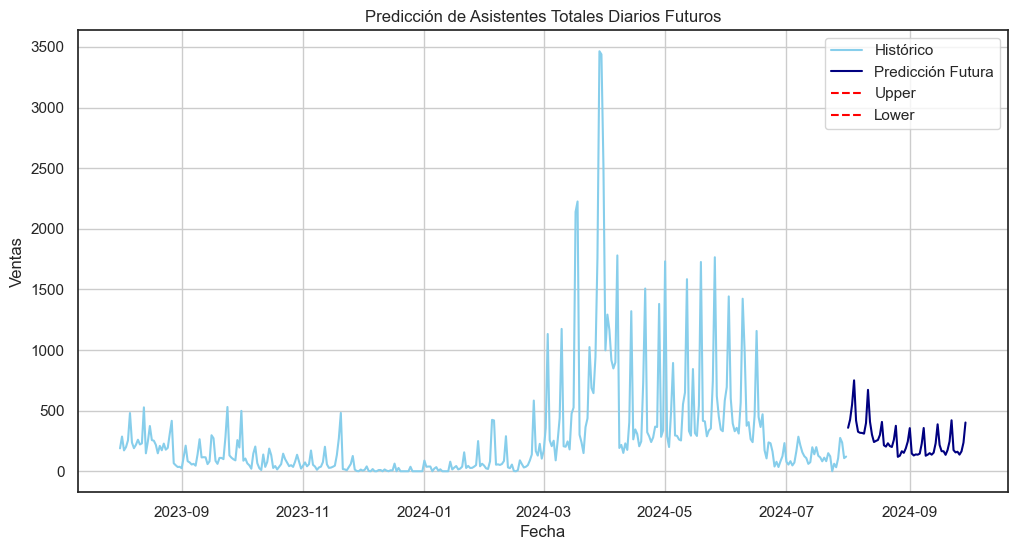

In [57]:
future_periods = 60
last_date = df_ts.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=future_periods, freq='D')

future_df = pd.DataFrame(index=future_dates)
future_forecast = model_ts.predict(testdata=future_df)

plt.figure(figsize=(12,6))
plt.plot(df_ts.index, df_ts['asistentes_totales'], label='Histórico', c = 'skyblue')
plt.plot(future_dates, future_forecast['yhat'], label='Predicción Futura', c = 'navy')

if len(future_forecast.columns) == 16:
    plt.plot(future_dates, future_forecast['yhat_upper'], label='Upper', linestyle='--', c = 'red')
    plt.plot(future_dates, future_forecast['yhat_lower'], label='Lower', linestyle='--', c = 'red')
    plt.fill_between(future_dates, future_forecast['yhat'], future_forecast['yhat_upper'], color='lightblue', alpha=0.4)
    plt.fill_between(future_dates, future_forecast['yhat'], future_forecast['yhat_lower'], color='lightblue', alpha=0.4)
    
if len(future_forecast.columns) == 4:
    plt.plot(future_dates, future_forecast['mean_ci_upper'], label='Upper', linestyle='--', c = 'red')
    plt.plot(future_dates, future_forecast['mean_ci_lower'], label='Lower', linestyle='--', c = 'red')

    plt.fill_between(future_dates, future_forecast['yhat'], future_forecast['mean_ci_upper'], color='lightblue', alpha=0.4)
    plt.fill_between(future_dates, future_forecast['yhat'], future_forecast['mean_ci_lower'], color='lightblue', alpha=0.4)

plt.title('Predicción de Asistentes Totales Diarios Futuros')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

### Forecast del pasado

Predicting using test dataframe shape = (366, 0) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for fecha. Provide strf_time format during "setup" for better results.
ML predictions completed


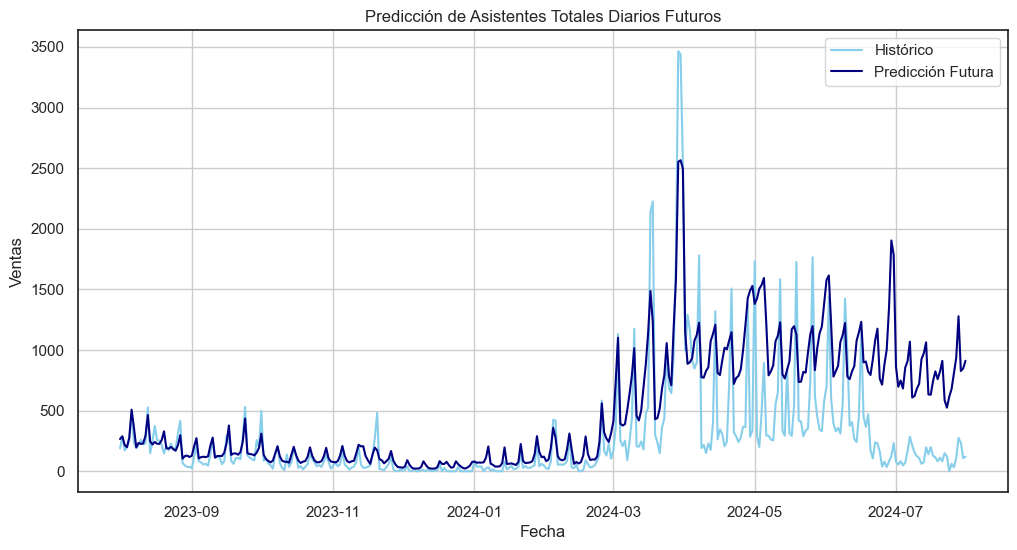

In [58]:
future_periods = 60
last_date = df_ts.index[-1]
future_dates = df_ts.index

future_df = pd.DataFrame(index=future_dates)
past_forecast = model_ts.predict(testdata=future_df)

plt.figure(figsize=(12,6))
plt.plot(df_ts.index, df_ts['asistentes_totales'], label='Histórico', c = 'skyblue')
plt.plot(future_dates, past_forecast['yhat'], label='Predicción Futura', c = 'navy')

plt.title('Predicción de Asistentes Totales Diarios Futuros')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

### Transformación de datos a proporciones
Se hace con real/prediccion

In [59]:
df_proporciones = pd.DataFrame()
df_proporciones['proporcion_niños'] = df['cantidad_niños'] / df['asistentes_totales']
df_proporciones['proporcion_adultos'] = df['cantidad_adultos'] / df['asistentes_totales']
df_proporciones['proporcion_alimento'] = df['alimento'] / df['ingreso_total']
df_proporciones['proporcion_extras'] = df['extras'] / df['ingreso_total']
df_proporciones['proporcion_total'] = (df_ts['asistentes_totales'] / past_forecast['yhat']).reset_index().drop(['fecha'], axis=1)
df_proporciones.head()

,proporcion_niños,proporcion_adultos,proporcion_alimento,proporcion_extras,proporcion_total
0,0.206349,0.433862,0.230317,0.060398,0.711224
1,0.192308,0.534965,0.248808,0.060527,0.992992
2,0.197674,0.569767,0.289409,0.054595,0.791973
3,0.276382,0.552764,0.233494,0.062997,1.002248
4,0.149020,0.592157,0.140576,0.053917,0.915151


## Método SEM

**Variable latente:** Satisfacción general por día.

**Varoables observables:** 
- temperatura_promedio
- proporcion_adultos
- proporcion_niños
- proporcion_extras
- proporcion_total
- is_wknd
- is_hs

Si el p-value de alguna variable excede el 5%, esta se remueve del modelo y se repite el proceso hasta no tener variables con p-value mayor al 5%.

### Definición del modelo

In [60]:
# Definir el modelo SEM usando la notación estándar de SEM
model_desc = """
# Latent Variables
Satisfaccion =~ temperatura_promedio + proporcion_adultos + proporcion_alimento + proporcion_extras + proporcion_total + is_hs
"""

In [61]:
df_SEM = df_proporciones
df_SEM['temperatura_promedio'] = df['temperatura_promedio']
df_SEM.head()

,proporcion_niños,proporcion_adultos,proporcion_alimento,proporcion_extras,proporcion_total,temperatura_promedio
0,0.206349,0.433862,0.230317,0.060398,0.711224,22
1,0.192308,0.534965,0.248808,0.060527,0.992992,24
2,0.197674,0.569767,0.289409,0.054595,0.791973,22
3,0.276382,0.552764,0.233494,0.062997,1.002248,21
4,0.149020,0.592157,0.140576,0.053917,0.915151,22


### Ajuste del modelo

In [62]:
numerical_features_SEM = ['temperatura_promedio','proporcion_adultos','proporcion_alimento','proporcion_extras','proporcion_total']

data_to_model_standarized_SEM = StandardScaler().fit_transform(df_SEM[numerical_features_SEM])

data_to_model_SEM = pd.DataFrame(data_to_model_standarized_SEM, 
                                columns=numerical_features_SEM)

data_to_model_SEM['is_hs'] = df['is_hs']

In [63]:
mod = Model(model_desc)
res_opt = mod.fit(data_to_model_SEM)
estimates = mod.inspect()

# Imprimir los resultados del ajuste del modelo
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,temperatura_promedio,~,Satisfaccion,1.000000,-,-,-
1,proporcion_adultos,~,Satisfaccion,-0.204914,0.07671,-2.671273,0.007556
2,proporcion_alimento,~,Satisfaccion,-0.341163,0.089019,-3.832485,0.000127
3,proporcion_extras,~,Satisfaccion,-0.146549,0.07312,-2.004244,0.045044
4,proporcion_total,~,Satisfaccion,0.301936,0.084942,3.554615,0.000379
5,is_hs,~,Satisfaccion,0.256041,0.054621,4.687599,0.000003
6,Satisfaccion,~~,Satisfaccion,0.738407,0.161676,4.5672,0.000005
7,is_hs,~~,is_hs,0.139787,0.014178,9.859128,0.0
8,proporcion_adultos,~~,proporcion_adultos,0.968885,0.072434,13.37616,0.0
9,proporcion_alimento,~~,proporcion_alimento,0.913817,0.070577,12.947835,0.0


### Resultados del modelo

In [64]:
# Cargar factores estimados (cargas factoriales)
confianza_factors = [1.0, -0.204914, -0.341163, -0.146549, 0.301936, 0.256041]  #temperatura, proporcion_adultos, proporcion_alimento, proporcion_extras
#proporcion_total, is_hs

# Función para calcular el valor de la variable latente
def calculate_latent_values(df):
    # Calcular Satisfaccion
    df['satisfaccion'] = (df_SEM['temperatura_promedio'] * confianza_factors[0] +
                       df_proporciones['proporcion_adultos'] * confianza_factors[1] +
                       df_proporciones['proporcion_alimento'] * confianza_factors[2] +
                       df_proporciones['proporcion_extras'] * confianza_factors[3] +
                       df_proporciones['proporcion_total'] * confianza_factors[4] +
                       df['is_hs'] * confianza_factors[5])
    
    return df[['satisfaccion']]

# Calcular valores latentes en el dataset
latent_values = calculate_latent_values(df)

# Mostrar los primeros valores calculados
latent_values['fecha'] = df['fecha']
latent_values.head()

,satisfaccion,fecha
0,22.038413,2023-08-01
1,24.096444,2023-08-02
2,22.015635,2023-08-03
3,21.100454,2023-08-04
4,22.099115,2023-08-05


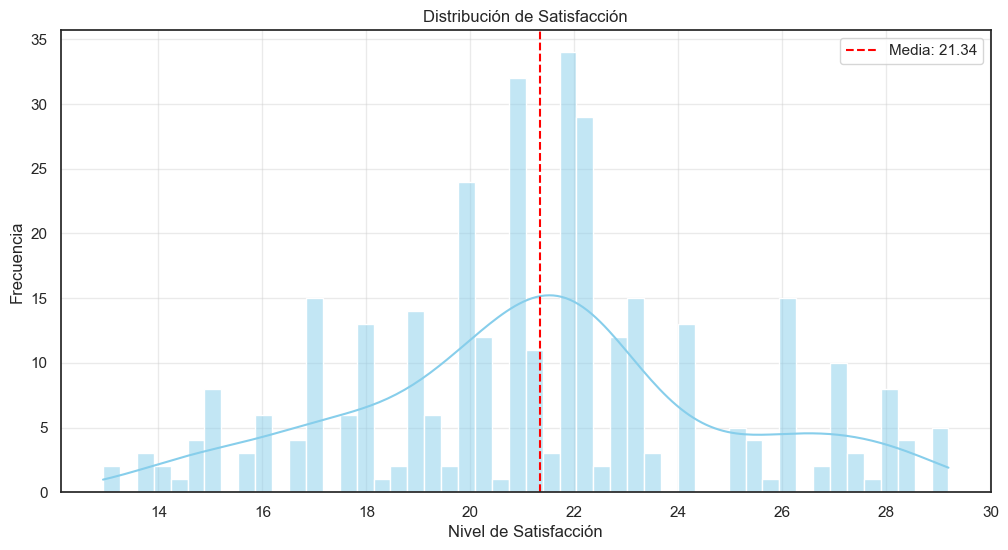

In [65]:
sns.histplot(
    data=latent_values['satisfaccion'], 
    bins=50,
    kde=True,  # Añade la curva de densidad
    color='skyblue'
)

sat_mean = latent_values['satisfaccion'].mean()

plt.title('Distribución de Satisfacción')
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Frecuencia')

plt.axvline(sat_mean, color='red', linestyle='--', label=f'Media: {sat_mean:.2f}')
plt.legend()

plt.grid(True, alpha=0.4)
plt.show()

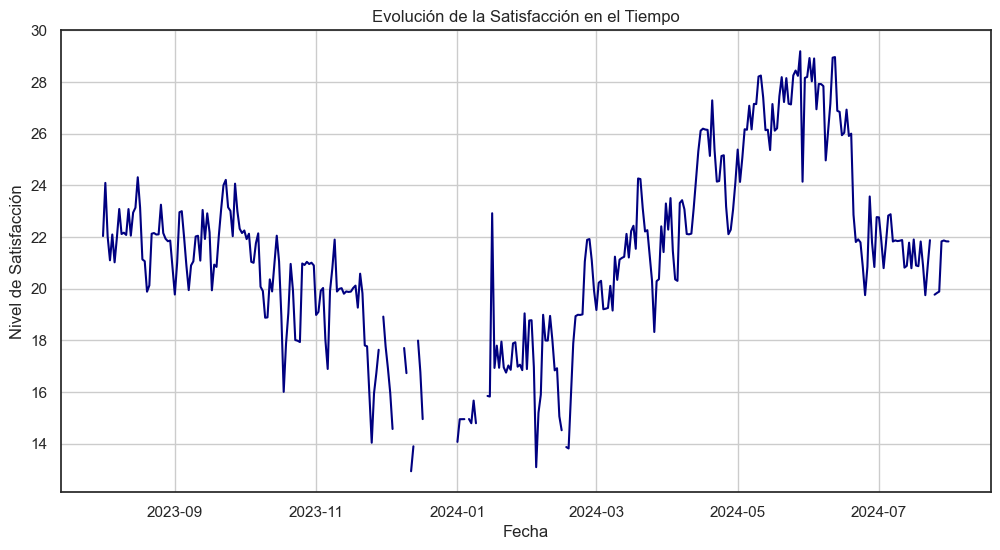

In [66]:
plt.plot(latent_values['fecha'],latent_values['satisfaccion'], c = 'navy')

plt.title('Evolución de la Satisfacción en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Nivel de Satisfacción')
plt.grid()

### Visualización del modelo

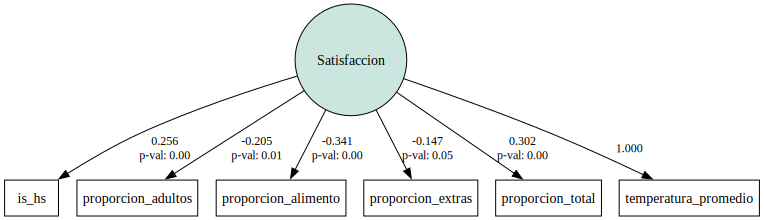

In [67]:
sm = semplot(mod, 'modelo_sem.png', engine = 'dot')
sm

### Análisis del modelo

Las variables seleccionadas, tras eliminar aquellas cuyo valor de p-value superaba 0.05, fueron: la temperatura promedio del día, la proporción de adultos respecto al total de visitantes, la proporción de compras adicionales en relación con los ingresos totales, la proporción de visitantes reales en comparación con los esperados y si era temporada alta o no. De estas, se tomó la temperatura promedio como la variable de referencia, asignándole un valor de 1, a partir del cual se compararon las demás.

Las tres variables que más influyeron en la satisfacción general diaria fueron: la temperatura promedio (valor de 1), seguida por la proporción total de asistentes reales contra los esperados(valor de 0.30) y, por último, si era temporada alta (valor de 0.26). También podemos notar que la proporción de adultos, de alimentos y de consumos extra tienen coeficiente negativo, por lo que si esta proporción crece, la satisfacción del día disminuye.

El impacto de estas variables en la satisfacción general se interpreta en función de cuánto afecta la variación de cada una en la ecuación final del modelo. Es decir, un cambio en alguna de estas variables tiene un efecto proporcional en la satisfacción general, según los valores estimados.

Además en la gráfica de la satisfacción en el tiempo se pueden apreciar huecos, estos correponden a los días que el parque recibió 0 visitantes, por lo que el modelo no puede calcular la satisfacción los días que no va nadie, lo cual hace sentido pues si no van personas al parque no hay una satisfacción que medir.

## Recomendaciones A/B testing

La recomendación para la empresa es la siguiente:

Que seleccione dos de sus albercas con las mismas características, es decir, del mismo tamaño y profundidad, ubicadas una junto a la otra, y que la única diferencia entre ellas sea que una cuente con calefacción y la otra no. Para que el experimento sea efectivo, será necesario asignar a un empleado en cada alberca que registre la hora de entrada y salida de los visitantes, escaneando un código que se encontrará en el brazalete de cada uno de ellos. Esto permitirá recopilar datos precisos sobre cuál de las albercas retiene a los visitantes por más tiempo, proporcionando información clave para evaluar el impacto de la calefacción en la preferencia y comportamiento de los visitantes.

## Recomendaciones de uso de AI

En la página web de los Camachos, implementar un chat bot que ayude a responder preguntas frecuentes sobre el parque a los posibles visitantes. Por ejemplo, que informe sobre la comida que se vende, si abre en días festivos, si hay eventos especiales, qué atracciones ofrece, y recomendaciones generales dependiendo de lo que las personas pregunten.

In [68]:
end_time = time.perf_counter()
execution_time = end_time - start_time
execution_time

18.126122874993598

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Luis Márquez, Ana Sofía Hinojosa, and Ivanna Herrera
</footer>